In [1]:
import os
import pandas as pd
import numpy as np 
import tarfile
import glob 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pickle 

In [2]:
path_julianne = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/Aug21_graph_data_updatedfilters/annotated_all_sample_shortlist.tsv'

In [3]:
sample = 'TCGA-BH-A18V-01A-11R-A12D-07'


In [4]:
def unique_kmers(filt_ohsu, col):
    all_kmers = set()
    for kmers in filt_ohsu[col]:
        if kmers is not np.nan:
            for kmer in kmers.split(';'):
                all_kmers.add(kmer)
    print('{} unique {} kmers'.format(len(all_kmers), col))
    return all_kmers

# Get ETH foreground kmers

In [5]:
read_foreground = False
int_file = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/extracted_with_annot_kmers.pq'
if read_foreground:
    list_foreground = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/cohort_mutNone_relink/Junc_BRCA_19077/*')

    all_eth = []
    for idx, file_ in enumerate(list_foreground):
        print(idx, len(list_foreground))
        all_eth.append(pd.read_parquet(file_,  columns = ['kmer','TCGA-BH-A18V-01A-11R-A12D-07.all']) )
    eth_sample_kmer = pd.concat(all_eth)
    eth_sample_kmer.to_parquet(int_file)
else:
    eth_sample_kmer = pd.read_parquet(int_file)

In [6]:
eth_sample_kmer = eth_sample_kmer.loc[eth_sample_kmer[sample + '.all'] > 0 ,:]

In [7]:
eth_sample_kmer = set(eth_sample_kmer['kmer'])

# Get OHSU foreground Kmers 

In [8]:
filt_ohsu = pd.read_csv(path_julianne, sep = '\t')

print('\n initial')
filt_ohsu = filt_ohsu.loc[filt_ohsu[sample] >0, : ] 
ohsu_sample_kmer = unique_kmers(filt_ohsu,  'prefiltered_in-frame_epitopes')



 initial
1227098 unique prefiltered_in-frame_epitopes kmers


#test

In [9]:
filt_ohsu = pd.read_csv(path_julianne, sep = '\t')


In [11]:
'PVRPEGKIS' in ohsu_sample_kmer

False

In [10]:
filt_ohsu.head()

,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,TCGA-BH-A18V-01A-11R-A12D-07,...,modified_upstream_txs,in-frame_all-transcript_biexons,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,in-frame neoepitopes,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons
0,chr10;48726;48803;-,0.000000,2.176140,0.842293,2.517914,0.961344,0.000000,5.700962,2.102386,1.237161,...,['ENST00000568584.5.MOD.CHR10.48726.48803.MINU...,TQIGQCGNQIGAKFWEVISDEHAIDSAGTYHGDSHLQLERINVYYN...,MNMPSTPLAPTTGTATCSWSASTCTTTRPAVAGQCGAGNNWA;TQI...,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASG;VYYNEASGG;YYNEASGGR;YNEASGGRY;NEASGG...,17.0,TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG,5.0,EHAIDSAGTYHGDSHLQLERINVYYNEASGGRSVWGRKQLGQ;TQI...
1,chr10;277578;281199;-,2.295572,30.465966,16.003571,10.071656,26.917642,51.966700,53.589040,31.535793,50.723584,...,['ENST00000280886.12.MOD.CHR10.277578.281199.M...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,RAHKSVTECAVFTWTNL,RAHKSVTECAVFTWTNL,RAHKSVTEC;AHKSVTECA;HKSVTECAV;KSVTECAVF;SVTECA...,9.0,NaN,0.0,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...
2,chr10;280261;281199;-,0.000000,0.000000,0.000000,0.000000,0.961344,0.000000,0.000000,6.307159,2.474321,...,['ENST00000280886.12.MOD.CHR10.280261.281199.M...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,RAHKSVTEC,RAHKSVTEC,RAHKSVTEC,1.0,NaN,0.0,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...
3,chr10;281324;283271;-,3.443358,23.212165,18.530451,15.107483,20.188231,32.821074,33.065578,44.150110,40.826300,...,['ENST00000634311.1.MOD.CHR10.281324.283271.MI...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...
4,chr10;283447;286272;-,1.147786,41.346668,19.372744,6.714437,28.840330,61.539513,62.710579,37.842952,92.787044,...,['ENST00000280886.12.MOD.CHR10.283447.286272.M...,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...,LGDSHLGEIWVHSAHNA,LGDSHLGEIWVHSAHNA,LGDSHLGEI;GDSHLGEIW;DSHLGEIWV;SHLGEIWVH;HLGEIW...,9.0,NaN,0.0,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...


# Investigate kmer Identity 

In [19]:
jx_test = [jx for jx in filt_ohsu['jx'] if 'chr6' in jx]
jx_test = [jx for jx in jx_test if '+' in jx]
jx_test = [jx for jx in jx_test if '83854' in jx] 

In [21]:
jx_test

['chr6;83853774;83854096;+',
 'chr6;83854162;83857241;+',
 'chr6;83854162;83854738;+']

In [ ]:
# pointer file genes 

In [56]:
point_genes='/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/ref_gene_folder_eq'

In [60]:
genes_to_files = pd.read_csv(point_genes, sep = ' ', header=None)
genes_to_files.columns = ['file', 'gene']

In [61]:
genes_to_files.head()

,file,gene
0,/cluster/work/grlab/projects/projects2020_OHSU...,ENSG00000062282.15
1,/cluster/work/grlab/projects/projects2020_OHSU...,ENSG00000198382.9
2,/cluster/work/grlab/projects/projects2020_OHSU...,ENSG00000085741.13
3,/cluster/work/grlab/projects/projects2020_OHSU...,ENSG00000137492.8
4,/cluster/work/grlab/projects/projects2020_OHSU...,ENSG00000179240.11


In [ ]:
# peptide files

In [26]:
list_meta = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/cohort_mutNone/*/ref_sample_peptides_meta.pq')

In [ ]:
# test kmers 

In [21]:
test_kmers = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_d4aee54_GTEXcore/abscent_cohortc1_sample0_file', header=None)

In [23]:
test_kmers.columns = ['kmer']

In [ ]:
# summary file ohsy 

In [9]:
filt_ohsu = pd.read_csv(path_julianne, sep = '\t')


In [25]:
filt_ohsu.head()

,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,TCGA-BH-A18V-01A-11R-A12D-07,...,modified_upstream_txs,in-frame_all-transcript_biexons,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,in-frame neoepitopes,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons
0,chr10;48726;48803;-,0.000000,2.176140,0.842293,2.517914,0.961344,0.000000,5.700962,2.102386,1.237161,...,['ENST00000568584.5.MOD.CHR10.48726.48803.MINU...,TQIGQCGNQIGAKFWEVISDEHAIDSAGTYHGDSHLQLERINVYYN...,MNMPSTPLAPTTGTATCSWSASTCTTTRPAVAGQCGAGNNWA;TQI...,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASG;VYYNEASGG;YYNEASGGR;YNEASGGRY;NEASGG...,17.0,TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG,5.0,EHAIDSAGTYHGDSHLQLERINVYYNEASGGRSVWGRKQLGQ;TQI...
1,chr10;277578;281199;-,2.295572,30.465966,16.003571,10.071656,26.917642,51.966700,53.589040,31.535793,50.723584,...,['ENST00000280886.12.MOD.CHR10.277578.281199.M...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,RAHKSVTECAVFTWTNL,RAHKSVTECAVFTWTNL,RAHKSVTEC;AHKSVTECA;HKSVTECAV;KSVTECAVF;SVTECA...,9.0,NaN,0.0,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...
2,chr10;280261;281199;-,0.000000,0.000000,0.000000,0.000000,0.961344,0.000000,0.000000,6.307159,2.474321,...,['ENST00000280886.12.MOD.CHR10.280261.281199.M...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,RAHKSVTEC,RAHKSVTEC,RAHKSVTEC,1.0,NaN,0.0,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...
3,chr10;281324;283271;-,3.443358,23.212165,18.530451,15.107483,20.188231,32.821074,33.065578,44.150110,40.826300,...,['ENST00000634311.1.MOD.CHR10.281324.283271.MI...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...
4,chr10;283447;286272;-,1.147786,41.346668,19.372744,6.714437,28.840330,61.539513,62.710579,37.842952,92.787044,...,['ENST00000280886.12.MOD.CHR10.283447.286272.M...,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...,LGDSHLGEIWVHSAHNA,LGDSHLGEIWVHSAHNA,LGDSHLGEI;GDSHLGEIW;DSHLGEIWV;SHLGEIWVH;HLGEIW...,9.0,NaN,0.0,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...


chr8;73297203;73321046;+
chr3;160401924;160404377;+
chr11;65188747;65188982;+
chr8;67219445;67226081;-
chr8;73297203;73321046;+
chr12;31497601;31499605;-
chr3;155085094;155087375;+
chr1;7970921;7970957;+
chr12;50086168;50099486;+
chr7;50762015;50792441;-
chr9;128582557;128583076;+
chr15;43386331;43387893;+
chr3;13609615;13614130;+
chr15;69423223;69426125;+
chr16;18431880;18513393;-
chr4;98392081;98417366;+
chr1;47260540;47263043;-
chr11;68603407;68614631;+
chr3;160401924;160404377;+
chr11;65188747;65188982;+
chr15;43386331;43387893;+
chr3;58126710;58126752;+
chr2;205766803;205778236;+
chr2;102657639;102708914;+
chr8;67219445;67226081;-
chr2;205766803;205778236;+
chr17;7260218;7260501;-
chr8;73297203;73321046;+
chr3;46964075;46976711;-
chr2;111785477;111788233;-
chr9;111781018;111791373;-
chr17;7260218;7260501;-
chr6;18171480;18180060;+
chr7;90297831;90307767;+
chr20;34075879;34078810;+
chr1;51794855;51798407;-
chr6;42249496;42256738;-
chr19;23224019;23231261;-
chr12;8224216;8224790;-
c

chr20;34075879;34078810;+
chr3;160417759;160419357;+
chr19;14152913;14155361;-
chr3;47729030;47729080;-
chr3;58126710;58126752;+
chr11;102378043;102378633;+
chr20;34290423;34290573;-
chr20;34075879;34078810;+
chr6;32858432;32859464;+
chr3;50646166;50646217;+
chr11;65188747;65188982;+
chr11;65188747;65204682;+
chr11;65188747;65211435;+
chr12;31497601;31499605;-
chr12;50086168;50099486;+
chr3;13609615;13614130;+
chr12;8224216;8224790;-
chr2;205766803;205778236;+
chr3;58098740;58134103;+
chr11;47424055;47424431;-
chr11;47424055;47424431;-
chr8;30607084;30607136;-
chr9;134780147;134810300;+
chr13;110173920;110177916;-
chr9;134758291;134810300;+
chr15;72474772;72496810;+
chr9;134758291;134810300;+
chr2;39024138;39054721;-
chr12;122753808;122769531;+
chr12;99239953;99244341;-
chr13;110173920;110177916;-
chr13;110174698;110177916;-
chr3;50646166;50646217;+
chr3;160417759;160419357;+
chr17;7260218;7260501;-
chr17;7260218;7260501;-
chr1;149926455;149927259;-
chr1;1047641;1050008;+
chr6;32858432

KeyboardInterrupt: 

In [43]:
kmers_in_eth = defaultdict(list)
for file_id, meta in enumerate(list_meta):
    print('{}/{}'.format(file_id, len(list_meta)))
    peptide_file = pd.read_parquet(meta, columns = ['peptide'])
    for kmer in test_kmers['kmer']:
        match_peptide = [idx for idx, peptide in enumerate(peptide_file['peptide']) if kmer in peptide]
        for match_line in match_peptide:
            peptide_file = pd.read_parquet(meta)
            kmers_in_eth[kmer].append(peptide_file.loc[match_line])

0/19692
1/19692
2/19692
3/19692
4/19692
5/19692
6/19692
7/19692
8/19692
9/19692
10/19692
11/19692
12/19692
13/19692
14/19692
15/19692
16/19692
17/19692
18/19692
19/19692
20/19692
21/19692
22/19692
23/19692
24/19692
25/19692
26/19692
27/19692
28/19692
29/19692
30/19692
31/19692
32/19692
33/19692
34/19692
35/19692
36/19692
37/19692
38/19692
39/19692
40/19692
41/19692
42/19692
43/19692
44/19692
45/19692
46/19692
47/19692
48/19692
49/19692
50/19692
51/19692
52/19692
53/19692
54/19692
55/19692
56/19692
57/19692
58/19692
59/19692
60/19692
61/19692
62/19692
63/19692
64/19692
65/19692
66/19692
67/19692
68/19692
69/19692
70/19692
71/19692
72/19692
73/19692
74/19692
75/19692
76/19692
77/19692
78/19692
79/19692
80/19692
81/19692
82/19692
83/19692
84/19692
85/19692
86/19692
87/19692
88/19692
89/19692
90/19692
91/19692
92/19692
93/19692
94/19692
95/19692
96/19692
97/19692
98/19692
99/19692
100/19692
101/19692
102/19692
103/19692
104/19692
105/19692
106/19692
107/19692
108/19692
109/19692
110/19692


833/19692
834/19692
835/19692
836/19692
837/19692
838/19692
839/19692
840/19692
841/19692
842/19692
843/19692
844/19692
845/19692
846/19692
847/19692
848/19692
849/19692
850/19692
851/19692
852/19692
853/19692
854/19692
855/19692
856/19692
857/19692
858/19692
859/19692
860/19692
861/19692
862/19692
863/19692
864/19692
865/19692
866/19692
867/19692
868/19692
869/19692
870/19692
871/19692
872/19692
873/19692
874/19692
875/19692
876/19692
877/19692
878/19692
879/19692
880/19692
881/19692
882/19692
883/19692
884/19692
885/19692
886/19692
887/19692
888/19692
889/19692
890/19692
891/19692
892/19692
893/19692
894/19692
895/19692
896/19692
897/19692
898/19692
899/19692
900/19692
901/19692
902/19692
903/19692
904/19692
905/19692
906/19692
907/19692
908/19692
909/19692
910/19692
911/19692
912/19692
913/19692
914/19692
915/19692
916/19692
917/19692
918/19692
919/19692
920/19692
921/19692
922/19692
923/19692
924/19692
925/19692
926/19692
927/19692
928/19692
929/19692
930/19692
931/19692
932/19692


1594/19692
1595/19692
1596/19692
1597/19692
1598/19692
1599/19692
1600/19692
1601/19692
1602/19692
1603/19692
1604/19692
1605/19692
1606/19692
1607/19692
1608/19692
1609/19692
1610/19692
1611/19692
1612/19692
1613/19692
1614/19692
1615/19692
1616/19692
1617/19692
1618/19692
1619/19692
1620/19692
1621/19692
1622/19692
1623/19692
1624/19692
1625/19692
1626/19692
1627/19692
1628/19692
1629/19692
1630/19692
1631/19692
1632/19692
1633/19692
1634/19692
1635/19692
1636/19692
1637/19692
1638/19692
1639/19692
1640/19692
1641/19692
1642/19692
1643/19692
1644/19692
1645/19692
1646/19692
1647/19692
1648/19692
1649/19692
1650/19692
1651/19692
1652/19692
1653/19692
1654/19692
1655/19692
1656/19692
1657/19692
1658/19692
1659/19692
1660/19692
1661/19692
1662/19692
1663/19692
1664/19692
1665/19692
1666/19692
1667/19692
1668/19692
1669/19692
1670/19692
1671/19692
1672/19692
1673/19692
1674/19692
1675/19692
1676/19692
1677/19692
1678/19692
1679/19692
1680/19692
1681/19692
1682/19692
1683/19692
1684/19692

2342/19692
2343/19692
2344/19692
2345/19692
2346/19692
2347/19692
2348/19692
2349/19692
2350/19692
2351/19692
2352/19692
2353/19692
2354/19692
2355/19692
2356/19692
2357/19692
2358/19692
2359/19692
2360/19692
2361/19692
2362/19692
2363/19692
2364/19692
2365/19692
2366/19692
2367/19692
2368/19692
2369/19692
2370/19692
2371/19692
2372/19692
2373/19692
2374/19692
2375/19692
2376/19692
2377/19692
2378/19692
2379/19692
2380/19692
2381/19692
2382/19692
2383/19692
2384/19692
2385/19692
2386/19692
2387/19692
2388/19692
2389/19692
2390/19692
2391/19692
2392/19692
2393/19692
2394/19692
2395/19692
2396/19692
2397/19692
2398/19692
2399/19692
2400/19692
2401/19692
2402/19692
2403/19692
2404/19692
2405/19692
2406/19692
2407/19692
2408/19692
2409/19692
2410/19692
2411/19692
2412/19692
2413/19692
2414/19692
2415/19692
2416/19692
2417/19692
2418/19692
2419/19692
2420/19692
2421/19692
2422/19692
2423/19692
2424/19692
2425/19692
2426/19692
2427/19692
2428/19692
2429/19692
2430/19692
2431/19692
2432/19692

3090/19692
3091/19692
3092/19692
3093/19692
3094/19692
3095/19692
3096/19692
3097/19692
3098/19692
3099/19692
3100/19692
3101/19692
3102/19692
3103/19692
3104/19692
3105/19692
3106/19692
3107/19692
3108/19692
3109/19692
3110/19692
3111/19692
3112/19692
3113/19692
3114/19692
3115/19692
3116/19692
3117/19692
3118/19692
3119/19692
3120/19692
3121/19692
3122/19692
3123/19692
3124/19692
3125/19692
3126/19692
3127/19692
3128/19692
3129/19692
3130/19692
3131/19692
3132/19692
3133/19692
3134/19692
3135/19692
3136/19692
3137/19692
3138/19692
3139/19692
3140/19692
3141/19692
3142/19692
3143/19692
3144/19692
3145/19692
3146/19692
3147/19692
3148/19692
3149/19692
3150/19692
3151/19692
3152/19692
3153/19692
3154/19692
3155/19692
3156/19692
3157/19692
3158/19692
3159/19692
3160/19692
3161/19692
3162/19692
3163/19692
3164/19692
3165/19692
3166/19692
3167/19692
3168/19692
3169/19692
3170/19692
3171/19692
3172/19692
3173/19692
3174/19692
3175/19692
3176/19692
3177/19692
3178/19692
3179/19692
3180/19692

3835/19692
3836/19692
3837/19692
3838/19692
3839/19692
3840/19692
3841/19692
3842/19692
3843/19692
3844/19692
3845/19692
3846/19692
3847/19692
3848/19692
3849/19692
3850/19692
3851/19692
3852/19692
3853/19692
3854/19692
3855/19692
3856/19692
3857/19692
3858/19692
3859/19692
3860/19692
3861/19692
3862/19692
3863/19692
3864/19692
3865/19692
3866/19692
3867/19692
3868/19692
3869/19692
3870/19692
3871/19692
3872/19692
3873/19692
3874/19692
3875/19692
3876/19692
3877/19692
3878/19692
3879/19692
3880/19692
3881/19692
3882/19692
3883/19692
3884/19692
3885/19692
3886/19692
3887/19692
3888/19692
3889/19692
3890/19692
3891/19692
3892/19692
3893/19692
3894/19692
3895/19692
3896/19692
3897/19692
3898/19692
3899/19692
3900/19692
3901/19692
3902/19692
3903/19692
3904/19692
3905/19692
3906/19692
3907/19692
3908/19692
3909/19692
3910/19692
3911/19692
3912/19692
3913/19692
3914/19692
3915/19692
3916/19692
3917/19692
3918/19692
3919/19692
3920/19692
3921/19692
3922/19692
3923/19692
3924/19692
3925/19692

4580/19692
4581/19692
4582/19692
4583/19692
4584/19692
4585/19692
4586/19692
4587/19692
4588/19692
4589/19692
4590/19692
4591/19692
4592/19692
4593/19692
4594/19692
4595/19692
4596/19692
4597/19692
4598/19692
4599/19692
4600/19692
4601/19692
4602/19692
4603/19692
4604/19692
4605/19692
4606/19692
4607/19692
4608/19692
4609/19692
4610/19692
4611/19692
4612/19692
4613/19692
4614/19692
4615/19692
4616/19692
4617/19692
4618/19692
4619/19692
4620/19692
4621/19692
4622/19692
4623/19692
4624/19692
4625/19692
4626/19692
4627/19692
4628/19692
4629/19692
4630/19692
4631/19692
4632/19692
4633/19692
4634/19692
4635/19692
4636/19692
4637/19692
4638/19692
4639/19692
4640/19692
4641/19692
4642/19692
4643/19692
4644/19692
4645/19692
4646/19692
4647/19692
4648/19692
4649/19692
4650/19692
4651/19692
4652/19692
4653/19692
4654/19692
4655/19692
4656/19692
4657/19692
4658/19692
4659/19692
4660/19692
4661/19692
4662/19692
4663/19692
4664/19692
4665/19692
4666/19692
4667/19692
4668/19692
4669/19692
4670/19692

5328/19692
5329/19692
5330/19692
5331/19692
5332/19692
5333/19692
5334/19692
5335/19692
5336/19692
5337/19692
5338/19692
5339/19692
5340/19692
5341/19692
5342/19692
5343/19692
5344/19692
5345/19692
5346/19692
5347/19692
5348/19692
5349/19692
5350/19692
5351/19692
5352/19692
5353/19692
5354/19692
5355/19692
5356/19692
5357/19692
5358/19692
5359/19692
5360/19692
5361/19692
5362/19692
5363/19692
5364/19692
5365/19692
5366/19692
5367/19692
5368/19692
5369/19692
5370/19692
5371/19692
5372/19692
5373/19692
5374/19692
5375/19692
5376/19692
5377/19692
5378/19692
5379/19692
5380/19692
5381/19692
5382/19692
5383/19692
5384/19692
5385/19692
5386/19692
5387/19692
5388/19692
5389/19692
5390/19692
5391/19692
5392/19692
5393/19692
5394/19692
5395/19692
5396/19692
5397/19692
5398/19692
5399/19692
5400/19692
5401/19692
5402/19692
5403/19692
5404/19692
5405/19692
5406/19692
5407/19692
5408/19692
5409/19692
5410/19692
5411/19692
5412/19692
5413/19692
5414/19692
5415/19692
5416/19692
5417/19692
5418/19692

6073/19692
6074/19692
6075/19692
6076/19692
6077/19692
6078/19692
6079/19692
6080/19692
6081/19692
6082/19692
6083/19692
6084/19692
6085/19692
6086/19692
6087/19692
6088/19692
6089/19692
6090/19692
6091/19692
6092/19692
6093/19692
6094/19692
6095/19692
6096/19692
6097/19692
6098/19692
6099/19692
6100/19692
6101/19692
6102/19692
6103/19692
6104/19692
6105/19692
6106/19692
6107/19692
6108/19692
6109/19692
6110/19692
6111/19692
6112/19692
6113/19692
6114/19692
6115/19692
6116/19692
6117/19692
6118/19692
6119/19692
6120/19692
6121/19692
6122/19692
6123/19692
6124/19692
6125/19692
6126/19692
6127/19692
6128/19692
6129/19692
6130/19692
6131/19692
6132/19692
6133/19692
6134/19692
6135/19692
6136/19692
6137/19692
6138/19692
6139/19692
6140/19692
6141/19692
6142/19692
6143/19692
6144/19692
6145/19692
6146/19692
6147/19692
6148/19692
6149/19692
6150/19692
6151/19692
6152/19692
6153/19692
6154/19692
6155/19692
6156/19692
6157/19692
6158/19692
6159/19692
6160/19692
6161/19692
6162/19692
6163/19692

6821/19692
6822/19692
6823/19692
6824/19692
6825/19692
6826/19692
6827/19692
6828/19692
6829/19692
6830/19692
6831/19692
6832/19692
6833/19692
6834/19692
6835/19692
6836/19692
6837/19692
6838/19692
6839/19692
6840/19692
6841/19692
6842/19692
6843/19692
6844/19692
6845/19692
6846/19692
6847/19692
6848/19692
6849/19692
6850/19692
6851/19692
6852/19692
6853/19692
6854/19692
6855/19692
6856/19692
6857/19692
6858/19692
6859/19692
6860/19692
6861/19692
6862/19692
6863/19692
6864/19692
6865/19692
6866/19692
6867/19692
6868/19692
6869/19692
6870/19692
6871/19692
6872/19692
6873/19692
6874/19692
6875/19692
6876/19692
6877/19692
6878/19692
6879/19692
6880/19692
6881/19692
6882/19692
6883/19692
6884/19692
6885/19692
6886/19692
6887/19692
6888/19692
6889/19692
6890/19692
6891/19692
6892/19692
6893/19692
6894/19692
6895/19692
6896/19692
6897/19692
6898/19692
6899/19692
6900/19692
6901/19692
6902/19692
6903/19692
6904/19692
6905/19692
6906/19692
6907/19692
6908/19692
6909/19692
6910/19692
6911/19692

7567/19692
7568/19692
7569/19692
7570/19692
7571/19692
7572/19692
7573/19692
7574/19692
7575/19692
7576/19692
7577/19692
7578/19692
7579/19692
7580/19692
7581/19692
7582/19692
7583/19692
7584/19692
7585/19692
7586/19692
7587/19692
7588/19692
7589/19692
7590/19692
7591/19692
7592/19692
7593/19692
7594/19692
7595/19692
7596/19692
7597/19692
7598/19692
7599/19692
7600/19692
7601/19692
7602/19692
7603/19692
7604/19692
7605/19692
7606/19692
7607/19692
7608/19692
7609/19692
7610/19692
7611/19692
7612/19692
7613/19692
7614/19692
7615/19692
7616/19692
7617/19692
7618/19692
7619/19692
7620/19692
7621/19692
7622/19692
7623/19692
7624/19692
7625/19692
7626/19692
7627/19692
7628/19692
7629/19692
7630/19692
7631/19692
7632/19692
7633/19692
7634/19692
7635/19692
7636/19692
7637/19692
7638/19692
7639/19692
7640/19692
7641/19692
7642/19692
7643/19692
7644/19692
7645/19692
7646/19692
7647/19692
7648/19692
7649/19692
7650/19692
7651/19692
7652/19692
7653/19692
7654/19692
7655/19692
7656/19692
7657/19692

8315/19692
8316/19692
8317/19692
8318/19692
8319/19692
8320/19692
8321/19692
8322/19692
8323/19692
8324/19692
8325/19692
8326/19692
8327/19692
8328/19692
8329/19692
8330/19692
8331/19692
8332/19692
8333/19692
8334/19692
8335/19692
8336/19692
8337/19692
8338/19692
8339/19692
8340/19692
8341/19692
8342/19692
8343/19692
8344/19692
8345/19692
8346/19692
8347/19692
8348/19692
8349/19692
8350/19692
8351/19692
8352/19692
8353/19692
8354/19692
8355/19692
8356/19692
8357/19692
8358/19692
8359/19692
8360/19692
8361/19692
8362/19692
8363/19692
8364/19692
8365/19692
8366/19692
8367/19692
8368/19692
8369/19692
8370/19692
8371/19692
8372/19692
8373/19692
8374/19692
8375/19692
8376/19692
8377/19692
8378/19692
8379/19692
8380/19692
8381/19692
8382/19692
8383/19692
8384/19692
8385/19692
8386/19692
8387/19692
8388/19692
8389/19692
8390/19692
8391/19692
8392/19692
8393/19692
8394/19692
8395/19692
8396/19692
8397/19692
8398/19692
8399/19692
8400/19692
8401/19692
8402/19692
8403/19692
8404/19692
8405/19692

9062/19692
9063/19692
9064/19692
9065/19692
9066/19692
9067/19692
9068/19692
9069/19692
9070/19692
9071/19692
9072/19692
9073/19692
9074/19692
9075/19692
9076/19692
9077/19692
9078/19692
9079/19692
9080/19692
9081/19692
9082/19692
9083/19692
9084/19692
9085/19692
9086/19692
9087/19692
9088/19692
9089/19692
9090/19692
9091/19692
9092/19692
9093/19692
9094/19692
9095/19692
9096/19692
9097/19692
9098/19692
9099/19692
9100/19692
9101/19692
9102/19692
9103/19692
9104/19692
9105/19692
9106/19692
9107/19692
9108/19692
9109/19692
9110/19692
9111/19692
9112/19692
9113/19692
9114/19692
9115/19692
9116/19692
9117/19692
9118/19692
9119/19692
9120/19692
9121/19692
9122/19692
9123/19692
9124/19692
9125/19692
9126/19692
9127/19692
9128/19692
9129/19692
9130/19692
9131/19692
9132/19692
9133/19692
9134/19692
9135/19692
9136/19692
9137/19692
9138/19692
9139/19692
9140/19692
9141/19692
9142/19692
9143/19692
9144/19692
9145/19692
9146/19692
9147/19692
9148/19692
9149/19692
9150/19692
9151/19692
9152/19692

9808/19692
9809/19692
9810/19692
9811/19692
9812/19692
9813/19692
9814/19692
9815/19692
9816/19692
9817/19692
9818/19692
9819/19692
9820/19692
9821/19692
9822/19692
9823/19692
9824/19692
9825/19692
9826/19692
9827/19692
9828/19692
9829/19692
9830/19692
9831/19692
9832/19692
9833/19692
9834/19692
9835/19692
9836/19692
9837/19692
9838/19692
9839/19692
9840/19692
9841/19692
9842/19692
9843/19692
9844/19692
9845/19692
9846/19692
9847/19692
9848/19692
9849/19692
9850/19692
9851/19692
9852/19692
9853/19692
9854/19692
9855/19692
9856/19692
9857/19692
9858/19692
9859/19692
9860/19692
9861/19692
9862/19692
9863/19692
9864/19692
9865/19692
9866/19692
9867/19692
9868/19692
9869/19692
9870/19692
9871/19692
9872/19692
9873/19692
9874/19692
9875/19692
9876/19692
9877/19692
9878/19692
9879/19692
9880/19692
9881/19692
9882/19692
9883/19692
9884/19692
9885/19692
9886/19692
9887/19692
9888/19692
9889/19692
9890/19692
9891/19692
9892/19692
9893/19692
9894/19692
9895/19692
9896/19692
9897/19692
9898/19692

10508/19692
10509/19692
10510/19692
10511/19692
10512/19692
10513/19692
10514/19692
10515/19692
10516/19692
10517/19692
10518/19692
10519/19692
10520/19692
10521/19692
10522/19692
10523/19692
10524/19692
10525/19692
10526/19692
10527/19692
10528/19692
10529/19692
10530/19692
10531/19692
10532/19692
10533/19692
10534/19692
10535/19692
10536/19692
10537/19692
10538/19692
10539/19692
10540/19692
10541/19692
10542/19692
10543/19692
10544/19692
10545/19692
10546/19692
10547/19692
10548/19692
10549/19692
10550/19692
10551/19692
10552/19692
10553/19692
10554/19692
10555/19692
10556/19692
10557/19692
10558/19692
10559/19692
10560/19692
10561/19692
10562/19692
10563/19692
10564/19692
10565/19692
10566/19692
10567/19692
10568/19692
10569/19692
10570/19692
10571/19692
10572/19692
10573/19692
10574/19692
10575/19692
10576/19692
10577/19692
10578/19692
10579/19692
10580/19692
10581/19692
10582/19692
10583/19692
10584/19692
10585/19692
10586/19692
10587/19692
10588/19692
10589/19692
10590/19692
1059

11194/19692
11195/19692
11196/19692
11197/19692
11198/19692
11199/19692
11200/19692
11201/19692
11202/19692
11203/19692
11204/19692
11205/19692
11206/19692
11207/19692
11208/19692
11209/19692
11210/19692
11211/19692
11212/19692
11213/19692
11214/19692
11215/19692
11216/19692
11217/19692
11218/19692
11219/19692
11220/19692
11221/19692
11222/19692
11223/19692
11224/19692
11225/19692
11226/19692
11227/19692
11228/19692
11229/19692
11230/19692
11231/19692
11232/19692
11233/19692
11234/19692
11235/19692
11236/19692
11237/19692
11238/19692
11239/19692
11240/19692
11241/19692
11242/19692
11243/19692
11244/19692
11245/19692
11246/19692
11247/19692
11248/19692
11249/19692
11250/19692
11251/19692
11252/19692
11253/19692
11254/19692
11255/19692
11256/19692
11257/19692
11258/19692
11259/19692
11260/19692
11261/19692
11262/19692
11263/19692
11264/19692
11265/19692
11266/19692
11267/19692
11268/19692
11269/19692
11270/19692
11271/19692
11272/19692
11273/19692
11274/19692
11275/19692
11276/19692
1127

11879/19692
11880/19692
11881/19692
11882/19692
11883/19692
11884/19692
11885/19692
11886/19692
11887/19692
11888/19692
11889/19692
11890/19692
11891/19692
11892/19692
11893/19692
11894/19692
11895/19692
11896/19692
11897/19692
11898/19692
11899/19692
11900/19692
11901/19692
11902/19692
11903/19692
11904/19692
11905/19692
11906/19692
11907/19692
11908/19692
11909/19692
11910/19692
11911/19692
11912/19692
11913/19692
11914/19692
11915/19692
11916/19692
11917/19692
11918/19692
11919/19692
11920/19692
11921/19692
11922/19692
11923/19692
11924/19692
11925/19692
11926/19692
11927/19692
11928/19692
11929/19692
11930/19692
11931/19692
11932/19692
11933/19692
11934/19692
11935/19692
11936/19692
11937/19692
11938/19692
11939/19692
11940/19692
11941/19692
11942/19692
11943/19692
11944/19692
11945/19692
11946/19692
11947/19692
11948/19692
11949/19692
11950/19692
11951/19692
11952/19692
11953/19692
11954/19692
11955/19692
11956/19692
11957/19692
11958/19692
11959/19692
11960/19692
11961/19692
1196

12563/19692
12564/19692
12565/19692
12566/19692
12567/19692
12568/19692
12569/19692
12570/19692
12571/19692
12572/19692
12573/19692
12574/19692
12575/19692
12576/19692
12577/19692
12578/19692
12579/19692
12580/19692
12581/19692
12582/19692
12583/19692
12584/19692
12585/19692
12586/19692
12587/19692
12588/19692
12589/19692
12590/19692
12591/19692
12592/19692
12593/19692
12594/19692
12595/19692
12596/19692
12597/19692
12598/19692
12599/19692
12600/19692
12601/19692
12602/19692
12603/19692
12604/19692
12605/19692
12606/19692
12607/19692
12608/19692
12609/19692
12610/19692
12611/19692
12612/19692
12613/19692
12614/19692
12615/19692
12616/19692
12617/19692
12618/19692
12619/19692
12620/19692
12621/19692
12622/19692
12623/19692
12624/19692
12625/19692
12626/19692
12627/19692
12628/19692
12629/19692
12630/19692
12631/19692
12632/19692
12633/19692
12634/19692
12635/19692
12636/19692
12637/19692
12638/19692
12639/19692
12640/19692
12641/19692
12642/19692
12643/19692
12644/19692
12645/19692
1264

13248/19692
13249/19692
13250/19692
13251/19692
13252/19692
13253/19692
13254/19692
13255/19692
13256/19692
13257/19692
13258/19692
13259/19692
13260/19692
13261/19692
13262/19692
13263/19692
13264/19692
13265/19692
13266/19692
13267/19692
13268/19692
13269/19692
13270/19692
13271/19692
13272/19692
13273/19692
13274/19692
13275/19692
13276/19692
13277/19692
13278/19692
13279/19692
13280/19692
13281/19692
13282/19692
13283/19692
13284/19692
13285/19692
13286/19692
13287/19692
13288/19692
13289/19692
13290/19692
13291/19692
13292/19692
13293/19692
13294/19692
13295/19692
13296/19692
13297/19692
13298/19692
13299/19692
13300/19692
13301/19692
13302/19692
13303/19692
13304/19692
13305/19692
13306/19692
13307/19692
13308/19692
13309/19692
13310/19692
13311/19692
13312/19692
13313/19692
13314/19692
13315/19692
13316/19692
13317/19692
13318/19692
13319/19692
13320/19692
13321/19692
13322/19692
13323/19692
13324/19692
13325/19692
13326/19692
13327/19692
13328/19692
13329/19692
13330/19692
1333

13934/19692
13935/19692
13936/19692
13937/19692
13938/19692
13939/19692
13940/19692
13941/19692
13942/19692
13943/19692
13944/19692
13945/19692
13946/19692
13947/19692
13948/19692
13949/19692
13950/19692
13951/19692
13952/19692
13953/19692
13954/19692
13955/19692
13956/19692
13957/19692
13958/19692
13959/19692
13960/19692
13961/19692
13962/19692
13963/19692
13964/19692
13965/19692
13966/19692
13967/19692
13968/19692
13969/19692
13970/19692
13971/19692
13972/19692
13973/19692
13974/19692
13975/19692
13976/19692
13977/19692
13978/19692
13979/19692
13980/19692
13981/19692
13982/19692
13983/19692
13984/19692
13985/19692
13986/19692
13987/19692
13988/19692
13989/19692
13990/19692
13991/19692
13992/19692
13993/19692
13994/19692
13995/19692
13996/19692
13997/19692
13998/19692
13999/19692
14000/19692
14001/19692
14002/19692
14003/19692
14004/19692
14005/19692
14006/19692
14007/19692
14008/19692
14009/19692
14010/19692
14011/19692
14012/19692
14013/19692
14014/19692
14015/19692
14016/19692
1401

14619/19692
14620/19692
14621/19692
14622/19692
14623/19692
14624/19692
14625/19692
14626/19692
14627/19692
14628/19692
14629/19692
14630/19692
14631/19692
14632/19692
14633/19692
14634/19692
14635/19692
14636/19692
14637/19692
14638/19692
14639/19692
14640/19692
14641/19692
14642/19692
14643/19692
14644/19692
14645/19692
14646/19692
14647/19692
14648/19692
14649/19692
14650/19692
14651/19692
14652/19692
14653/19692
14654/19692
14655/19692
14656/19692
14657/19692
14658/19692
14659/19692
14660/19692
14661/19692
14662/19692
14663/19692
14664/19692
14665/19692
14666/19692
14667/19692
14668/19692
14669/19692
14670/19692
14671/19692
14672/19692
14673/19692
14674/19692
14675/19692
14676/19692
14677/19692
14678/19692
14679/19692
14680/19692
14681/19692
14682/19692
14683/19692
14684/19692
14685/19692
14686/19692
14687/19692
14688/19692
14689/19692
14690/19692
14691/19692
14692/19692
14693/19692
14694/19692
14695/19692
14696/19692
14697/19692
14698/19692
14699/19692
14700/19692
14701/19692
1470

15304/19692
15305/19692
15306/19692
15307/19692
15308/19692
15309/19692
15310/19692
15311/19692
15312/19692
15313/19692
15314/19692
15315/19692
15316/19692
15317/19692
15318/19692
15319/19692
15320/19692
15321/19692
15322/19692
15323/19692
15324/19692
15325/19692
15326/19692
15327/19692
15328/19692
15329/19692
15330/19692
15331/19692
15332/19692
15333/19692
15334/19692
15335/19692
15336/19692
15337/19692
15338/19692
15339/19692
15340/19692
15341/19692
15342/19692
15343/19692
15344/19692
15345/19692
15346/19692
15347/19692
15348/19692
15349/19692
15350/19692
15351/19692
15352/19692
15353/19692
15354/19692
15355/19692
15356/19692
15357/19692
15358/19692
15359/19692
15360/19692
15361/19692
15362/19692
15363/19692
15364/19692
15365/19692
15366/19692
15367/19692
15368/19692
15369/19692
15370/19692
15371/19692
15372/19692
15373/19692
15374/19692
15375/19692
15376/19692
15377/19692
15378/19692
15379/19692
15380/19692
15381/19692
15382/19692
15383/19692
15384/19692
15385/19692
15386/19692
1538

15991/19692
15992/19692
15993/19692
15994/19692
15995/19692
15996/19692
15997/19692
15998/19692
15999/19692
16000/19692
16001/19692
16002/19692
16003/19692
16004/19692
16005/19692
16006/19692
16007/19692
16008/19692
16009/19692
16010/19692
16011/19692
16012/19692
16013/19692
16014/19692
16015/19692
16016/19692
16017/19692
16018/19692
16019/19692
16020/19692
16021/19692
16022/19692
16023/19692
16024/19692
16025/19692
16026/19692
16027/19692
16028/19692
16029/19692
16030/19692
16031/19692
16032/19692
16033/19692
16034/19692
16035/19692
16036/19692
16037/19692
16038/19692
16039/19692
16040/19692
16041/19692
16042/19692
16043/19692
16044/19692
16045/19692
16046/19692
16047/19692
16048/19692
16049/19692
16050/19692
16051/19692
16052/19692
16053/19692
16054/19692
16055/19692
16056/19692
16057/19692
16058/19692
16059/19692
16060/19692
16061/19692
16062/19692
16063/19692
16064/19692
16065/19692
16066/19692
16067/19692
16068/19692
16069/19692
16070/19692
16071/19692
16072/19692
16073/19692
1607

16676/19692
16677/19692
16678/19692
16679/19692
16680/19692
16681/19692
16682/19692
16683/19692
16684/19692
16685/19692
16686/19692
16687/19692
16688/19692
16689/19692
16690/19692
16691/19692
16692/19692
16693/19692
16694/19692
16695/19692
16696/19692
16697/19692
16698/19692
16699/19692
16700/19692
16701/19692
16702/19692
16703/19692
16704/19692
16705/19692
16706/19692
16707/19692
16708/19692
16709/19692
16710/19692
16711/19692
16712/19692
16713/19692
16714/19692
16715/19692
16716/19692
16717/19692
16718/19692
16719/19692
16720/19692
16721/19692
16722/19692
16723/19692
16724/19692
16725/19692
16726/19692
16727/19692
16728/19692
16729/19692
16730/19692
16731/19692
16732/19692
16733/19692
16734/19692
16735/19692
16736/19692
16737/19692
16738/19692
16739/19692
16740/19692
16741/19692
16742/19692
16743/19692
16744/19692
16745/19692
16746/19692
16747/19692
16748/19692
16749/19692
16750/19692
16751/19692
16752/19692
16753/19692
16754/19692
16755/19692
16756/19692
16757/19692
16758/19692
1675

17359/19692
17360/19692
17361/19692
17362/19692
17363/19692
17364/19692
17365/19692
17366/19692
17367/19692
17368/19692
17369/19692
17370/19692
17371/19692
17372/19692
17373/19692
17374/19692
17375/19692
17376/19692
17377/19692
17378/19692
17379/19692
17380/19692
17381/19692
17382/19692
17383/19692
17384/19692
17385/19692
17386/19692
17387/19692
17388/19692
17389/19692
17390/19692
17391/19692
17392/19692
17393/19692
17394/19692
17395/19692
17396/19692
17397/19692
17398/19692
17399/19692
17400/19692
17401/19692
17402/19692
17403/19692
17404/19692
17405/19692
17406/19692
17407/19692
17408/19692
17409/19692
17410/19692
17411/19692
17412/19692
17413/19692
17414/19692
17415/19692
17416/19692
17417/19692
17418/19692
17419/19692
17420/19692
17421/19692
17422/19692
17423/19692
17424/19692
17425/19692
17426/19692
17427/19692
17428/19692
17429/19692
17430/19692
17431/19692
17432/19692
17433/19692
17434/19692
17435/19692
17436/19692
17437/19692
17438/19692
17439/19692
17440/19692
17441/19692
1744

18043/19692
18044/19692
18045/19692
18046/19692
18047/19692
18048/19692
18049/19692
18050/19692
18051/19692
18052/19692
18053/19692
18054/19692
18055/19692
18056/19692
18057/19692
18058/19692
18059/19692
18060/19692
18061/19692
18062/19692
18063/19692
18064/19692
18065/19692
18066/19692
18067/19692
18068/19692
18069/19692
18070/19692
18071/19692
18072/19692
18073/19692
18074/19692
18075/19692
18076/19692
18077/19692
18078/19692
18079/19692
18080/19692
18081/19692
18082/19692
18083/19692
18084/19692
18085/19692
18086/19692
18087/19692
18088/19692
18089/19692
18090/19692
18091/19692
18092/19692
18093/19692
18094/19692
18095/19692
18096/19692
18097/19692
18098/19692
18099/19692
18100/19692
18101/19692
18102/19692
18103/19692
18104/19692
18105/19692
18106/19692
18107/19692
18108/19692
18109/19692
18110/19692
18111/19692
18112/19692
18113/19692
18114/19692
18115/19692
18116/19692
18117/19692
18118/19692
18119/19692
18120/19692
18121/19692
18122/19692
18123/19692
18124/19692
18125/19692
1812

18730/19692
18731/19692
18732/19692
18733/19692
18734/19692
18735/19692
18736/19692
18737/19692
18738/19692
18739/19692
18740/19692
18741/19692
18742/19692
18743/19692
18744/19692
18745/19692
18746/19692
18747/19692
18748/19692
18749/19692
18750/19692
18751/19692
18752/19692
18753/19692
18754/19692
18755/19692
18756/19692
18757/19692
18758/19692
18759/19692
18760/19692
18761/19692
18762/19692
18763/19692
18764/19692
18765/19692
18766/19692
18767/19692
18768/19692
18769/19692
18770/19692
18771/19692
18772/19692
18773/19692
18774/19692
18775/19692
18776/19692
18777/19692
18778/19692
18779/19692
18780/19692
18781/19692
18782/19692
18783/19692
18784/19692
18785/19692
18786/19692
18787/19692
18788/19692
18789/19692
18790/19692
18791/19692
18792/19692
18793/19692
18794/19692
18795/19692
18796/19692
18797/19692
18798/19692
18799/19692
18800/19692
18801/19692
18802/19692
18803/19692
18804/19692
18805/19692
18806/19692
18807/19692
18808/19692
18809/19692
18810/19692
18811/19692
18812/19692
1881

19416/19692
19417/19692
19418/19692
19419/19692
19420/19692
19421/19692
19422/19692
19423/19692
19424/19692
19425/19692
19426/19692
19427/19692
19428/19692
19429/19692
19430/19692
19431/19692
19432/19692
19433/19692
19434/19692
19435/19692
19436/19692
19437/19692
19438/19692
19439/19692
19440/19692
19441/19692
19442/19692
19443/19692
19444/19692
19445/19692
19446/19692
19447/19692
19448/19692
19449/19692
19450/19692
19451/19692
19452/19692
19453/19692
19454/19692
19455/19692
19456/19692
19457/19692
19458/19692
19459/19692
19460/19692
19461/19692
19462/19692
19463/19692
19464/19692
19465/19692
19466/19692
19467/19692
19468/19692
19469/19692
19470/19692
19471/19692
19472/19692
19473/19692
19474/19692
19475/19692
19476/19692
19477/19692
19478/19692
19479/19692
19480/19692
19481/19692
19482/19692
19483/19692
19484/19692
19485/19692
19486/19692
19487/19692
19488/19692
19489/19692
19490/19692
19491/19692
19492/19692
19493/19692
19494/19692
19495/19692
19496/19692
19497/19692
19498/19692
1949

In [48]:
kmers_in_eth

defaultdict(list,
            {'CLLRNNQLR': [peptide                                          SSQKQPAEKCLLRNNQLR
              id                    ENSG00000174501.14:148_143:0:95929265:2-exons
              readFrame                                                         0
              geneName                                         ENSG00000174501.14
              geneChr                                                        chr2
              geneStrand                                                        -
              mutationMode                                                    ref
              junctionAnnotated                                                 0
              hasStopCodon                                                      0
              isInJunctionList                                                nan
              isIsolated                                                        0
              variantComb                                          

In [46]:
pickle.dump(kmers_in_eth, open('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_d4aee54_GTEXcore/abscentS_tested_in_metadata.pickle', 'wb'))

In [49]:
not_generated = [kmer for kmer in test_kmers['kmer'] if kmer not in kmers_in_eth]

In [50]:
len(not_generated)

1257

In [47]:
len(kmers_in_eth)

16

In [51]:
not_gener = pd.DataFrame(not_generated, columns = ['kmer'])

In [54]:
not_gener.to_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_d4aee54_GTEXcore/abscentS_in_metadata_notgenerated.txt', index=None)

In [198]:
for idx, kmer in enumerate(not_gener['kmer']):
    print('\n')
    print('............................................................')
    print('kmer of interest: {}, id {}'.format(kmer, idx))
    idx_pres = [ idx for idx, kmer_list in enumerate(filt_ohsu['prefiltered_in-frame_epitopes']) \
               if kmer in str(kmer_list)]
    for junction in idx_pres:
        jx_contain_kmer_ohsu = filt_ohsu.loc[junction]
        gene = jx_contain_kmer_ohsu['gene_id']
        metafile_eth = genes_to_files.loc[genes_to_files['gene'] == gene, 'file']
        if metafile_eth.shape[0]:
            metafile_eth = metafile_eth.values[0]
            peptide_file = pd.read_parquet(os.path.join(metafile_eth, 'ref_sample_peptides_meta.pq'))
            matched_meta_gene_origin = peptide_file.loc[peptide_file['geneName'] == gene]
            jct_1 = int(jx_contain_kmer_ohsu['jx'].split(';')[1])
            jct_2 = int(jx_contain_kmer_ohsu['jx'].split(';')[2])
            strand = jx_contain_kmer_ohsu['jx'].split(';')[3]

            jct_1 -=1
            print('OHSU Location is: ')
            print(jx_contain_kmer_ohsu['jx'])
            candidate_jct1_eth = [ jx_eth  for jx_eth in matched_meta_gene_origin['modifiedExonsCoord'] if 
                                 (str(jct_1)  in jx_eth) ] 
            candidate_jct2_eth = [ jx_eth  for jx_eth in matched_meta_gene_origin['modifiedExonsCoord'] if 
                                 (str(jct_2) in jx_eth)]
            candidate_both_eth = [ jx_eth  for jx_eth in matched_meta_gene_origin['modifiedExonsCoord'] if 
                                 (str(jct_1)  in jx_eth)  and (str(jct_2) in jx_eth)]
            print('ETH junctions with single matching coordinate for {}'.format(jct_1))
            print(candidate_jct1_eth)
            print('\n')
            print('ETH junctions with single matching coordinate for {}'.format(jct_2))
            print(candidate_jct2_eth)
            print('\n')

            print('............................................................')
    #         print(candidate_both_eth)



............................................................
kmer of interest: AAALQAGND, id 0
OHSU Location is: 
chr8;73297203;73321046;+
ETH junctions with single matching coordinate for 73297202
[]


ETH junctions with single matching coordinate for 73321046
['73319095;73319194;73321046;73321076;None;None', '73321046;73321077;73322678;73322809;None;None']


............................................................


............................................................
kmer of interest: AAETAKRPA, id 1
OHSU Location is: 
chr3;160401924;160404377;+
ETH junctions with single matching coordinate for 160401923
['160401916;160401923;160411919;160412083;None;None', '160400826;160400965;160401914;160401923;160411919;160412083', '160400925;160400965;160401914;160401923;160411919;160412083']


ETH junctions with single matching coordinate for 160404377
['160401916;160402093;160404377;160404503;None;None', '160401991;160402093;160404377;160404503;None;None', '160402675;160402867;1

OHSU Location is: 
chr15;69423223;69426125;+
ETH junctions with single matching coordinate for 69423222
[]


ETH junctions with single matching coordinate for 69426125
['69422325;69422435;69426125;69426180;None;None', '69423159;69423329;69426125;69426180;None;None', '69425282;69425323;69426125;69426180;None;None']


............................................................


............................................................
kmer of interest: AEGRTTAAF, id 14
OHSU Location is: 
chr16;18431880;18513393;-
ETH junctions with single matching coordinate for 18431879
[]


ETH junctions with single matching coordinate for 18513393
[]


............................................................


............................................................
kmer of interest: AELDESMQK, id 15
OHSU Location is: 
chr4;98392081;98417366;+
ETH junctions with single matching coordinate for 98392080
['98391953;98392080;98392751;98392951;None;None', '98391953;98392080;98394238;98394438;N

OHSU Location is: 
chr17;7260218;7260501;-
ETH junctions with single matching coordinate for 7260217
[]


ETH junctions with single matching coordinate for 7260501
[]


............................................................


............................................................
kmer of interest: AGNDTGMFR, id 27
OHSU Location is: 
chr8;73297203;73321046;+
ETH junctions with single matching coordinate for 73297202
[]


ETH junctions with single matching coordinate for 73321046
['73319095;73319194;73321046;73321076;None;None', '73321046;73321077;73322678;73322809;None;None']


............................................................


............................................................
kmer of interest: AGTGRRGKG, id 28
OHSU Location is: 
chr3;46964075;46976711;-
ETH junctions with single matching coordinate for 46964074
[]


ETH junctions with single matching coordinate for 46976711
[]


............................................................


..........

OHSU Location is: 
chr21;26053308;26170563;-
ETH junctions with single matching coordinate for 26053307
[]


ETH junctions with single matching coordinate for 26170563
['26170563;26170620;25955626;25955755;None;None', '26170563;26170620;26000014;26000182;None;None', '26170563;26170620;26021922;26022042;None;None/26170563;26170620;26021841;26022042;None;None/26170563;26170620;26002124;26002322;None;None', '26170563;26170620;26051001;26051193;None;None', '26170563;26170620;26051160;26051193;None;None', '26170563;26170620;26053235;26053289;None;None', '26170563;26170620;26053237;26053348;None;None', '26170563;26170620;26089511;26090072;None;None', '26170563;26170620;26089943;26090072;None;None', '26170563;26170620;26111978;26112104;None;None', '26170563;26170620;26111978;26112146;None;None', '26170563;26170620;26111979;26112159;None;None', '26170563;26170620;26111984;26112146;None;None', '26170563;26170620;26112134;26112146;None;None', '26170563;26170620;26122784;26122982;None;None', '261

OHSU Location is: 
chr5;142004971;142005018;-
ETH junctions with single matching coordinate for 142004970
[]


ETH junctions with single matching coordinate for 142005018
[]


............................................................


............................................................
kmer of interest: AMHRAINDN, id 53
OHSU Location is: 
chr12;123590392;123590439;+
ETH junctions with single matching coordinate for 123590391
[]


ETH junctions with single matching coordinate for 123590439
['123590439;123590446;nan;nan;None;None', '123590439;123590449;123594155;123594295;None;None', '123590439;123590449;123596604;123597341;None;None/123590439;123590449;123596604;123597092;None;None/123590439;123590449;123596604;123598580;None;None']


............................................................


............................................................
kmer of interest: AMTEKQMQS, id 54
OHSU Location is: 
chr5;13754326;13758845;-
ETH junctions with single matching coord

OHSU Location is: 
chr7;98910088;98910292;+
ETH junctions with single matching coordinate for 98910087
[]


ETH junctions with single matching coordinate for 98910292
['98910055;98910116;98910292;98910417;None;None']


............................................................


............................................................
kmer of interest: ARSCMPSDH, id 66
OHSU Location is: 
chr5;170795426;170797466;+
ETH junctions with single matching coordinate for 170795425
['170789129;170789247;170795207;170795425;None;None', '170794231;170794265;170795207;170795425;None;None/170794231;170794265;170795207;170795242;None;None', '170795207;170795425;170797465;170797520;None;None', '170795208;170795425;170797465;170797521;None;None', '170795207;170795425;170797465;170797547;None;None', '170795208;170795425;170797465;170797548;None;None', '170795207;170795425;170805715;170805851;None;None/170795207;170795425;170805715;170805740;None;None', '170795208;170795425;170805715;170805741;Non

OHSU Location is: 
chr12;49325561;49325808;+
ETH junctions with single matching coordinate for 49325560
['49323608;49323677;49325500;49325560;None;None/49323608;49323677;49325500;49325656;None;None', '49323608;49323752;49325500;49325560;None;None/49323608;49323752;49325500;49325656;None;None', '49323844;49323946;49325500;49325656;None;None/49323844;49323946;49325500;49325560;None;None', '49325502;49325560;49325746;49325883;None;None', '49325502;49325560;49325826;49325882;None;None', '49325502;49325560;49326667;49326720;None;None', '49325502;49325560;49327226;49327327;None;None']


ETH junctions with single matching coordinate for 49325808
[]


............................................................


............................................................
kmer of interest: ATKVPLIRA, id 76
OHSU Location is: 
chr7;30621474;30632425;+
ETH junctions with single matching coordinate for 30621473
[]


ETH junctions with single matching coordinate for 30632425
[]


.................

OHSU Location is: 
chr13;59961829;59969943;-
ETH junctions with single matching coordinate for 59961828
[]


ETH junctions with single matching coordinate for 59969943
['59969943;59970058;59774728;59774823;None;None', '59969943;59970058;59916154;59916249;None;None', '59969943;59970058;59924775;59924870;None;None', '59969943;59970058;59927235;59927435;None;None', '59969943;59970058;59927346;59927435;None;None', '59969943;59970058;59932648;59932815;None;None', '59969943;59970058;59962353;59962553;None;None', '59969943;59970058;59962510;59962710;None;None', '59969943;59970058;59965334;59965534;None;None', '59969943;59970058;59967696;59967896;None;None', '59969943;59970058;59967798;59967899;None;None/59969943;59970058;59967819;59967899;None;None/59969943;59970058;59967699;59967899;None;None']


............................................................


............................................................
kmer of interest: CEGRQKTLK, id 92
OHSU Location is: 
chr2;108735554;10875

OHSU Location is: 
chr3;155085094;155087375;+
ETH junctions with single matching coordinate for 155085093
['155084167;155084327;155085058;155085093;None;None']


ETH junctions with single matching coordinate for 155087375
[]


............................................................


............................................................
kmer of interest: CKAEEDVQK, id 101
OHSU Location is: 
chr15;69423223;69426125;+
ETH junctions with single matching coordinate for 69423222
[]


ETH junctions with single matching coordinate for 69426125
['69422325;69422435;69426125;69426180;None;None', '69423159;69423329;69426125;69426180;None;None', '69425282;69425323;69426125;69426180;None;None']


............................................................


............................................................
kmer of interest: CKDDQLEFG, id 102
OHSU Location is: 
chr2;55643205;55643318;-
ETH junctions with single matching coordinate for 55643204
[]


ETH junctions with single m

OHSU Location is: 
chr8;67219445;67226081;-
ETH junctions with single matching coordinate for 67219444
[]


ETH junctions with single matching coordinate for 67226081
['67226081;67226181;67224902;67225024;None;None', '67226081;67226181;67224977;67225033;None;None/67226081;67226181;67224914;67225033;None;None/67226081;67226181;67224902;67225033;None;None']


............................................................


............................................................
kmer of interest: CNIFRPGMP, id 110
OHSU Location is: 
chr1;116616176;116616371;-
ETH junctions with single matching coordinate for 116616175
[]


ETH junctions with single matching coordinate for 116616371
[]


............................................................


............................................................
kmer of interest: CPESAEFCS, id 111
OHSU Location is: 
chr1;155197253;155198134;-
ETH junctions with single matching coordinate for 155197252
[]


ETH junctions with single matchin

OHSU Location is: 
chr2;3333746;3338016;-
ETH junctions with single matching coordinate for 3333745
[]


ETH junctions with single matching coordinate for 3338016
['3377647;3377689;3338016;3338085;None;None', '3354549;3354633;3338016;3338085;None;None', '3338016;3338149;3214150;3214248;None;None', '3338016;3338149;3257300;3257455;None;None', '3338016;3338149;3274339;3274419;None;None', '3338016;3338149;3302995;3303195;None;None', '3338016;3338149;3304067;3304267;None;None', '3338016;3338149;3307452;3307652;None;None', '3338016;3338149;3318857;3318958;None;None', '3338016;3338149;3319612;3320361;None;None', '3338016;3338149;3321065;3321265;None;None', '3338016;3338149;3331934;3332134;None;None', '3338016;3338149;3333541;3333741;None;None', '3338016;3338083;3214150;3214248;None;None', '3338016;3338083;3257300;3257455;None;None', '3338016;3338083;3274339;3274419;None;None', '3338016;3338083;3318857;3318958;None;None']


............................................................


......

OHSU Location is: 
chr15;72474772;72496810;+
ETH junctions with single matching coordinate for 72474771
['72474645;72474771;72496790;72496856;None;None', '72474645;72474771;72518066;72518132;None;None', '72474645;72474771;72544819;72544921;None;None/72474645;72474771;72544819;72544963;None;None', '72474645;72474771;72570176;72570305;None;None']


ETH junctions with single matching coordinate for 72496810
[]


............................................................


............................................................
kmer of interest: DEKLFADAP, id 129
OHSU Location is: 
chr1;149926455;149927259;-
ETH junctions with single matching coordinate for 149926454
[]


ETH junctions with single matching coordinate for 149927259
['149927725;149927759;149927259;149927294;None;None', '149927259;149927292;149926376;149926541;None;None', '149927259;149927292;149926376;149926544;None;None', '149927259;149927292;149926382;149926541;None;None']


.........................................

OHSU Location is: 
chr15;72474772;72496810;+
ETH junctions with single matching coordinate for 72474771
['72474645;72474771;72496790;72496856;None;None', '72474645;72474771;72518066;72518132;None;None', '72474645;72474771;72544819;72544921;None;None/72474645;72474771;72544819;72544963;None;None', '72474645;72474771;72570176;72570305;None;None']


ETH junctions with single matching coordinate for 72496810
[]


............................................................


............................................................
kmer of interest: DLGGREGTF, id 143
OHSU Location is: 
chr1;1047641;1050008;+
ETH junctions with single matching coordinate for 1047640
[]


ETH junctions with single matching coordinate for 1050008
[]


............................................................


............................................................
kmer of interest: DLIQELVEA, id 144
OHSU Location is: 
chr11;47424055;47424431;-
ETH junctions with single matching coordinate for 4742

OHSU Location is: 
chr2;111785477;111788233;-
ETH junctions with single matching coordinate for 111785476
['111785359;111785476;111784322;111784400;None;None', '111785359;111785476;111784324;111784432;None;None', '111785359;111785476;111784328;111784400;None;None', '111785359;111785476;111784752;111784950;None;None']


ETH junctions with single matching coordinate for 111788233
['111800796;111800871;111788233;111788320;None;None', '111794077;111794131;111788233;111788320;None;None', '111790020;111790080;111788233;111788320;None;None', '111788233;111788319;111785359;111785477;None;None', '111788233;111788319;111787329;111787528;None;None']


............................................................


............................................................
kmer of interest: DNSTSLQTS, id 156
OHSU Location is: 
chr12;26578832;26580026;-
ETH junctions with single matching coordinate for 26578831
[]


ETH junctions with single matching coordinate for 26580026
['26595470;26595590;265

OHSU Location is: 
chr1;226164858;226165893;-
ETH junctions with single matching coordinate for 226164857
['226164857;226164928;226161532;226161689;None;None']


ETH junctions with single matching coordinate for 226165893
['226186389;226186675;226165893;226166000;None;None', '226165893;226165998;226161530;226161689;None;None', '226165893;226165998;226164788;226164929;None;None']


............................................................


............................................................
kmer of interest: DTERETSAP, id 167
OHSU Location is: 
chr16;89746891;89761948;-
ETH junctions with single matching coordinate for 89746890
['89758576;89758704;89746832;89746890;None;None', '89748658;89748766;89746761;89746890;None;None', '89748658;89748766;89746830;89746890;None;None', '89748658;89748714;89746832;89746890;None;None', '89746830;89746890;89746583;89746688;None;None', '89746759;89746890;89744686;89745071;None;None', '89746759;89746890;89744959;89745071;None;None', '8974675

OHSU Location is: 
chr15;43386331;43387893;+
ETH junctions with single matching coordinate for 43386330
['43385790;43385956;43386205;43386330;None;None', '43386207;43386330;43386405;43386603;None;None', '43386207;43386330;43394540;43395686;None;None', '43386207;43386330;43395106;43395157;None;None', '43386207;43386330;43395582;43395687;None;None', '43386207;43386330;43397213;43397321;None;None', '43386207;43386330;43398040;43398382;None;None/43386207;43386330;43398040;43398178;None;None']


ETH junctions with single matching coordinate for 43387893
[]


............................................................


............................................................
kmer of interest: EAKDGPGSY, id 178
OHSU Location is: 
chr6;42249496;42256738;-
ETH junctions with single matching coordinate for 42249495
['42254850;42254924;42249296;42249495;None;None/42254850;42254924;42249371;42249495;None;None', '42254850;42254926;42249295;42249495;None;None', '42254850;42254926;42249370;4224

OHSU Location is: 
chr15;44551523;44557469;+
ETH junctions with single matching coordinate for 44551522
['44550875;44550930;44551430;44551522;None;None', '44551432;44551522;44554552;44554573;None;None', '44551432;44551522;44554552;44554666;None;None', '44551432;44551522;44554552;44554711;None;None', '44551432;44551522;44554556;44554667;None;None', '44551432;44551522;44556360;44556558;None;None', '44551432;44551522;44557488;44557650;None;None/44551432;44551522;44557488;44557749;None;None', '44551478;44551522;44554552;44554667;None;None/44551478;44551522;44554552;44554574;None;None']


ETH junctions with single matching coordinate for 44557469
['44554552;44554667;44557469;44557648;None;None', '44554624;44554667;44557469;44557648;None;None']


............................................................


............................................................
kmer of interest: EEISRLRQC, id 191
OHSU Location is: 
chr1;36009595;36014022;+
ETH junctions with single matching coordinate

OHSU Location is: 
chr8;23333432;23341110;-
ETH junctions with single matching coordinate for 23333431
[]


ETH junctions with single matching coordinate for 23341110
[]


............................................................


............................................................
kmer of interest: EHAGLTPQP, id 204
OHSU Location is: 
chr11;61135008;61138736;-
ETH junctions with single matching coordinate for 61135007
[]


ETH junctions with single matching coordinate for 61138736
['61138736;61138829;61133256;61133337;None;None/61138736;61138829;61132758;61133337;None;None', '61138736;61138829;61134036;61134207;None;None', '61138736;61138829;61134035;61134230;None;None', '61138736;61138829;61134045;61134207;None;None', '61138736;61138829;61134148;61134346;None;None', '61138736;61138829;61134301;61134346;None;None', '61138736;61138829;61134776;61134974;None;None', '61138736;61138829;61134869;61134974;None;None', '61138736;61138829;61138005;61138203;None;None']


..........

OHSU Location is: 
chr9;134780147;134810300;+
ETH junctions with single matching coordinate for 134780146
['134772789;134772834;134780101;134780146;None;None', '134774859;134774912;134775246;134780146;None;None/134774859;134774912;134775246;134775445;None;None', '134774858;134774912;134780101;134780146;None;None', '134774876;134774912;134780101;134780146;None;None', '134780101;134780146;134782666;134782720;None;None', '134780103;134780146;134782666;134782719;None;None', '134780101;134780146;134789154;134789208;None;None', '134780103;134780146;134789154;134789207;None;None']


ETH junctions with single matching coordinate for 134810300
[]


............................................................


............................................................
kmer of interest: EKERRVNQV, id 215
OHSU Location is: 
chr13;110173920;110177916;-
ETH junctions with single matching coordinate for 110173919
[]


ETH junctions with single matching coordinate for 110177916
[]


...............

OHSU Location is: 
chr6;75237988;75241175;-
ETH junctions with single matching coordinate for 75237987
[]


ETH junctions with single matching coordinate for 75241175
['75243716;75243734;75241175;75241265;None;None', '75243716;75243830;75241175;75241265;None;None', '75241821;75241959;75241175;75241265;None;None', '75241821;75241938;75241175;75241265;None;None', '75241821;75241869;75241175;75241265;None;None', '75241175;75241265;75237676;75237982;None;None', '75241175;75241265;75237823;75237988;None;None/75241175;75241265;75237790;75237988;None;None/75241175;75241265;75237685;75237988;None;None/75241175;75241265;75237787;75237988;None;None/75241175;75241265;75237676;75237988;None;None', '75241175;75241265;75237883;75237988;None;None', '75241175;75241265;75237898;75237988;None;None', '75241175;75241265;75237901;75237988;None;None', '75241175;75241265;75237910;75237988;None;None', '75241175;75241265;75237913;75237988;None;None', '75241175;75241265;75237922;75237988;None;None', '75241175;7

OHSU Location is: 
chr3;160417759;160419357;+
ETH junctions with single matching coordinate for 160417758
[]


ETH junctions with single matching coordinate for 160419357
['160416250;160416415;160419357;160419501;None;None', '160416250;160416415;160419357;160419543;None;None', '160416250;160416415;160419357;160419546;None;None', '160417722;160417956;160419357;160419501;None;None', '160417722;160417956;160419357;160419543;None;None', '160417722;160417956;160419357;160419546;None;None', '160419357;160419502;nan;nan;None;None', '160419357;160419543;160420739;160420901;None;None', '160419357;160419543;160423424;160423592;None;None', '160419357;160419543;160423424;160423649;None;None', '160419357;160419548;160420739;160420899;None;None', '160419357;160419548;160423424;160423593;None;None/160419357;160419548;160423424;160423650;None;None']


............................................................


............................................................
kmer of interest: ELNTLNREQ,

OHSU Location is: 
chr2;201130008;201138808;+
ETH junctions with single matching coordinate for 201130007
['201129865;201130007;201130084;201130146;None;None', '201129865;201130007;201133028;201133102;None;None/201129865;201130007;201133028;201133132;None;None', '201129865;201130007;201133098;201133133;None;None', '201129865;201130007;201140356;201140439;None;None', '201129865;201130007;201140356;201140661;None;None/201129865;201130007;201140356;201140733;None;None']


ETH junctions with single matching coordinate for 201138808
[]


............................................................


............................................................
kmer of interest: ERESELTRL, id 251
OHSU Location is: 
chr1;93217870;93270346;+
ETH junctions with single matching coordinate for 93217869
['93216635;93216746;93217737;93217869;None;None', '93217737;93217869;93218502;93218700;None;None', '93217737;93217869;93219301;93219499;None;None', '93217737;93217869;93219346;93219544;None;None', '

OHSU Location is: 
chr12;8754006;8777741;+
ETH junctions with single matching coordinate for 8754005
[]


ETH junctions with single matching coordinate for 8777741
['8751958;8752043;8777741;8777800;None;None', '8773322;8773466;8777741;8777801;None;None']


............................................................


............................................................
kmer of interest: ESLGSEEEA, id 261
OHSU Location is: 
chr14;21353505;21353537;-
ETH junctions with single matching coordinate for 21353504
[]


ETH junctions with single matching coordinate for 21353537
[]


............................................................


............................................................
kmer of interest: ESLVSLLKQ, id 262
OHSU Location is: 
chr3;37282075;37296086;+
ETH junctions with single matching coordinate for 37282074
[]


ETH junctions with single matching coordinate for 37296086
['37294978;37295077;37296086;37296200;None;None', '37294987;37295077;37296086;37296

OHSU Location is: 
chr11;47308700;47309261;+
ETH junctions with single matching coordinate for 47308699
['47295942;47296055;47308590;47308699;None;None', '47308590;47308699;47308979;47309041;None;None', '47308590;47308699;47308979;47309401;None;None', '47308590;47308699;47309280;47309399;None;None', '47308590;47308699;47309286;47309399;None;None', '47308590;47308699;47309506;47309610;None;None']


ETH junctions with single matching coordinate for 47309261
[]


............................................................


............................................................
kmer of interest: ETLAKDESM, id 272
OHSU Location is: 
chr1;51794855;51798407;-
ETH junctions with single matching coordinate for 51794854
['51803813;51803963;51794824;51794854;None;None', '51800555;51800683;51794823;51794854;None;None', '51798272;51798410;51794824;51794854;None;None', '51798248;51798410;51794824;51794854;None;None', '51798221;51798410;51794824;51794854;None;None', '51798242;51798410;5179482

OHSU Location is: 
chr13;59961829;59969943;-
ETH junctions with single matching coordinate for 59961828
[]


ETH junctions with single matching coordinate for 59969943
['59969943;59970058;59774728;59774823;None;None', '59969943;59970058;59916154;59916249;None;None', '59969943;59970058;59924775;59924870;None;None', '59969943;59970058;59927235;59927435;None;None', '59969943;59970058;59927346;59927435;None;None', '59969943;59970058;59932648;59932815;None;None', '59969943;59970058;59962353;59962553;None;None', '59969943;59970058;59962510;59962710;None;None', '59969943;59970058;59965334;59965534;None;None', '59969943;59970058;59967696;59967896;None;None', '59969943;59970058;59967798;59967899;None;None/59969943;59970058;59967819;59967899;None;None/59969943;59970058;59967699;59967899;None;None']


............................................................


............................................................
kmer of interest: FCKAEEDVQ, id 284
OHSU Location is: 
chr15;69423223;6942

OHSU Location is: 
chr6;154778046;154815715;+
ETH junctions with single matching coordinate for 154778045
['154773973;154774072;154778000;154778045;None;None', '154773988;154774072;154778000;154778045;None;None', '154778000;154778045;154787860;154788022;None;None', '154778000;154778045;154787870;154788020;None;None', '154778000;154778045;154792822;154792858;None;None', '154778000;154778045;154792822;154792945;None;None', '154778000;154778045;154792822;154792975;None;None', '154778000;154778045;154795008;154795137;None;None']


ETH junctions with single matching coordinate for 154815715
['154733422;154733934;154773988;154774070;None;None/154733422;154733930;154741955;154742041;None;None/154733422;154733930;154787860;154788021;None;None/154733422;154733930;154792822;154792944;None;None/154733422;154733930;154792822;154792857;None;None/154733422;154733930;154757931;154758131;None;None/154733422;154733930;154773973;154774071;None;None/154733422;154733930;154808069;154808200;None;None/15473

OHSU Location is: 
chr12;10612769;10613438;-
ETH junctions with single matching coordinate for 10612768
[]


ETH junctions with single matching coordinate for 10613438
['10613438;10613532;10609099;10609188;None;None', '10613438;10613532;10610612;10610680;None;None', '10613438;10613532;10610623;10610670;None;None', '10613438;10613532;10610621;10610680;None;None', '10613438;10613532;10610697;10610897;None;None', '10613438;10613532;10611981;10612181;None;None', '10613438;10613532;10612640;10612657;None;None', '10613438;10613532;10612641;10612967;None;None', '10613438;10613532;10612814;10612978;None;None/10613438;10613532;10612826;10612978;None;None/10613438;10613532;10612640;10612978;None;None', '10613438;10613532;10612946;10613005;None;None/10613438;10613532;10612640;10613005;None;None', '10613438;10613532;10612872;10613072;None;None', '10613438;10613532;10612946;10612978;None;None']


............................................................


........................................

OHSU Location is: 
chr12;31497601;31499605;-
ETH junctions with single matching coordinate for 31497600
[]


ETH junctions with single matching coordinate for 31499605
['31499605;31499669;31495809;31495919;None;None']


............................................................


............................................................
kmer of interest: GAAYPRPGL, id 319
OHSU Location is: 
chr12;50086168;50099486;+
ETH junctions with single matching coordinate for 50086167
[]


ETH junctions with single matching coordinate for 50099486
['50098713;50098728;50099486;50099564;None;None/50098713;50098728;50099486;50099843;None;None', '50094437;50094572;50098713;50098728;50099486;50099843/50094437;50094572;50098713;50098728;50099486;50099564', '50096849;50096972;50098713;50098728;50099486;50099843/50096849;50096972;50098713;50098728;50099486;50099564']


............................................................


............................................................
kmer of 

OHSU Location is: 
chr12;99239953;99244341;-
ETH junctions with single matching coordinate for 99239952
[]


ETH junctions with single matching coordinate for 99244341
['99244341;99244414;99084925;99085023;None;None', '99244341;99244414;99154288;99154395;None;None', '99244341;99244414;99168648;99168848;None;None', '99244341;99244414;99170626;99170826;None;None', '99244341;99244414;99178009;99178209;None;None', '99244341;99244414;99208493;99208693;None;None', '99244341;99244414;99214988;99215188;None;None']


............................................................


............................................................
kmer of interest: GFPGSKGEK, id 335
OHSU Location is: 
chr13;110173920;110177916;-
ETH junctions with single matching coordinate for 110173919
[]


ETH junctions with single matching coordinate for 110177916
[]


............................................................
OHSU Location is: 
chr13;110174698;110177916;-
ETH junctions with single matching coordi

OHSU Location is: 
chr5;16704689;16710907;-
ETH junctions with single matching coordinate for 16704688
[]


ETH junctions with single matching coordinate for 16710907
['16711159;16711191;16710907;16711022;None;None', '16711159;16711245;16710907;16711022;None;None', '16711120;16711191;16710907;16711022;None;None', '16711120;16711245;16710907;16711022;None;None', '16711079;16711191;16710907;16711014;None;None', '16711079;16711245;16710907;16711014;None;None', '16710907;16711021;16704580;16704685;None;None', '16710907;16711021;16704656;16704854;None;None', '16710907;16711021;16706632;16706830;None;None', '16710907;16711021;16707754;16707952;None;None', '16710907;16711021;16710307;16710505;None;None', '16710907;16711012;16704580;16704685;None;None', '16710907;16711012;16704656;16704854;None;None', '16710907;16711012;16706632;16706830;None;None', '16710907;16711012;16707754;16707952;None;None', '16710907;16711012;16710307;16710505;None;None']


..............................................

OHSU Location is: 
chr4;98392081;98417366;+
ETH junctions with single matching coordinate for 98392080
['98391953;98392080;98392751;98392951;None;None', '98391953;98392080;98394238;98394438;None;None', '98391953;98392080;98395940;98396350;None;None/98391953;98392080;98395940;98396908;None;None', '98391953;98392080;98404455;98404586;None;None', '98391953;98392080;98404476;98404586;None;None', '98391953;98392080;98404476;98404601;None;None', '98391953;98392080;98404488;98404586;None;None', '98391953;98392080;98416744;98416887;None;None']


ETH junctions with single matching coordinate for 98417366
['98416746;98416888;98417366;98417401;None;None', '98416746;98416888;98417366;98417497;None;None']


............................................................


............................................................
kmer of interest: GPAIFIGWG, id 363
OHSU Location is: 
chr17;7260218;7260501;-
ETH junctions with single matching coordinate for 7260217
[]


ETH junctions with single matc

OHSU Location is: 
chr3;47729030;47729080;-
ETH junctions with single matching coordinate for 47729029
[]


ETH junctions with single matching coordinate for 47729080
[]


............................................................


............................................................
kmer of interest: GTGRRGKGA, id 380
OHSU Location is: 
chr3;46964075;46976711;-
ETH junctions with single matching coordinate for 46964074
[]


ETH junctions with single matching coordinate for 46976711
[]


............................................................


............................................................
kmer of interest: GTKGEKENR, id 381
OHSU Location is: 
chr9;134780147;134810300;+
ETH junctions with single matching coordinate for 134780146
['134772789;134772834;134780101;134780146;None;None', '134774859;134774912;134775246;134780146;None;None/134774859;134774912;134775246;134775445;None;None', '134774858;134774912;134780101;134780146;None;None', '134774876;134774912

OHSU Location is: 
chr16;18418423;18500558;-
ETH junctions with single matching coordinate for 18418422
[]


ETH junctions with single matching coordinate for 18500558
[]


............................................................


............................................................
kmer of interest: HECGNGASR, id 396
OHSU Location is: 
chr6;44251748;44252039;+
ETH junctions with single matching coordinate for 44251747
[]


ETH junctions with single matching coordinate for 44252039
[]


............................................................


............................................................
kmer of interest: HENDDDSLP, id 397
OHSU Location is: 
chr8;102279180;102280403;-
ETH junctions with single matching coordinate for 102279179
[]


ETH junctions with single matching coordinate for 102280403
[]


............................................................


............................................................
kmer of interest: HGRDLYNEW, id 398

OHSU Location is: 
chr3;47729030;47729080;-
ETH junctions with single matching coordinate for 47729029
[]


ETH junctions with single matching coordinate for 47729080
[]


............................................................


............................................................
kmer of interest: HQKGQTPAE, id 410
OHSU Location is: 
chr2;241413416;241417961;+
ETH junctions with single matching coordinate for 241413415
[]


ETH junctions with single matching coordinate for 241417961
['241373107;241373290;241417961;241418108;None;None', '241413308;241413419;241417961;241418108;None;None', '241413308;241413421;241417961;241418109;None;None']


............................................................


............................................................
kmer of interest: HQMELNTLN, id 411
OHSU Location is: 
chr17;81191319;81192372;-
ETH junctions with single matching coordinate for 81191318
[]


ETH junctions with single matching coordinate for 81192372
[]


..

OHSU Location is: 
chr7;98910088;98910292;+
ETH junctions with single matching coordinate for 98910087
[]


ETH junctions with single matching coordinate for 98910292
['98910055;98910116;98910292;98910417;None;None']


............................................................


............................................................
kmer of interest: IASKPLLPR, id 423
OHSU Location is: 
chr19;34377881;34378933;+
ETH junctions with single matching coordinate for 34377880
['34377734;34377773;34377817;34377880;None;None']


ETH junctions with single matching coordinate for 34378933
['34368555;34368702;34378933;34379005;None;None', '34368582;34368702;34378933;34379005;None;None', '34368582;34368702;34378933;34379032;None;None', '34377734;34377881;34378933;34379005;None;None', '34377734;34377881;34378933;34379032;None;None', '34377817;34377881;34378933;34379004;None;None', '34378933;34379005;34379396;34379561;None;None', '34378933;34379005;34379517;34379553;None;None', '34378933;343

OHSU Location is: 
chr6;44251748;44252039;+
ETH junctions with single matching coordinate for 44251747
[]


ETH junctions with single matching coordinate for 44252039
[]


............................................................


............................................................
kmer of interest: IHHQSVSTT, id 440
OHSU Location is: 
chr8;38347776;38347935;-
ETH junctions with single matching coordinate for 38347775
['38347935;38348171;38347498;38347775;None;None', '38347956;38348171;38347498;38347775;None;None']


ETH junctions with single matching coordinate for 38347935
['38347935;38348171;38347498;38347775;None;None']


............................................................


............................................................
kmer of interest: IIASKPLLP, id 441
OHSU Location is: 
chr19;34377881;34378933;+
ETH junctions with single matching coordinate for 34377880
['34377734;34377773;34377817;34377880;None;None']


ETH junctions with single matching co



............................................................
kmer of interest: ILEFHQKGQ, id 451
OHSU Location is: 
chr2;241413416;241417961;+
ETH junctions with single matching coordinate for 241413415
[]


ETH junctions with single matching coordinate for 241417961
['241373107;241373290;241417961;241418108;None;None', '241413308;241413419;241417961;241418108;None;None', '241413308;241413421;241417961;241418109;None;None']


............................................................


............................................................
kmer of interest: ILKEQFLNH, id 452
OHSU Location is: 
chr1;159045355;159045446;+
ETH junctions with single matching coordinate for 159045354
[]


ETH junctions with single matching coordinate for 159045446
[]


............................................................


............................................................
kmer of interest: ILKVQVLLL, id 453
OHSU Location is: 
chr1;7970921;7970957;+
ETH junctions with single matc

OHSU Location is: 
chr6;154778046;154815715;+
ETH junctions with single matching coordinate for 154778045
['154773973;154774072;154778000;154778045;None;None', '154773988;154774072;154778000;154778045;None;None', '154778000;154778045;154787860;154788022;None;None', '154778000;154778045;154787870;154788020;None;None', '154778000;154778045;154792822;154792858;None;None', '154778000;154778045;154792822;154792945;None;None', '154778000;154778045;154792822;154792975;None;None', '154778000;154778045;154795008;154795137;None;None']


ETH junctions with single matching coordinate for 154815715
['154733422;154733934;154773988;154774070;None;None/154733422;154733930;154741955;154742041;None;None/154733422;154733930;154787860;154788021;None;None/154733422;154733930;154792822;154792944;None;None/154733422;154733930;154792822;154792857;None;None/154733422;154733930;154757931;154758131;None;None/154733422;154733930;154773973;154774071;None;None/154733422;154733930;154808069;154808200;None;None/15473

OHSU Location is: 
chr2;205766803;205778236;+
ETH junctions with single matching coordinate for 205766802
['205765473;205765570;205766782;205766802;None;None']


ETH junctions with single matching coordinate for 205778236
[]


............................................................


............................................................
kmer of interest: ISESTPVER, id 475
OHSU Location is: 
chr10;833887;836402;-
ETH junctions with single matching coordinate for 833886
[]


ETH junctions with single matching coordinate for 836402
['863742;863881;836402;836506;None;None', '844976;845055;836402;836506;None;None', '842931;843067;836402;836506;None;None', '836402;836504;806913;813213;None;None/836402;836504;809541;813213;None;None/836402;836504;811806;813213;None;None/836402;836504;812922;813213;None;None/836402;836504;812505;813213;None;None', '836402;836504;825765;825870;None;None', '836402;836504;829680;829734;None;None', '836402;836504;830868;830883;None;None', '836402;83650

OHSU Location is: 
chr12;112134800;112142088;+
ETH junctions with single matching coordinate for 112134799
[]


ETH junctions with single matching coordinate for 112142088
['112140818;112141224;112142088;112142147;None;None', '112140818;112141224;112142088;112142294;None;None', '112140818;112141222;112142088;112142293;None;None/112140818;112141222;112142088;112142146;None;None', '112140818;112141202;112142088;112142148;None;None', '112140818;112141202;112142088;112142295;None;None', '112140818;112140980;112142088;112142148;None;None', '112140818;112140980;112142088;112142295;None;None', '112140818;112140942;112142088;112142147;None;None', '112140818;112140942;112142088;112142294;None;None', '112140818;112141016;112142088;112142148;None;None', '112140818;112141016;112142088;112142295;None;None', '112140962;112140980;112142088;112142295;None;None', '112140962;112141224;112142088;112142147;None;None', '112140962;112141224;112142088;112142294;None;None', '112142088;112142148;nan;nan;None;N

OHSU Location is: 
chr6;42249496;42256738;-
ETH junctions with single matching coordinate for 42249495
['42254850;42254924;42249296;42249495;None;None/42254850;42254924;42249371;42249495;None;None', '42254850;42254926;42249295;42249495;None;None', '42254850;42254926;42249370;42249495;None;None', '42254888;42254926;42249371;42249495;None;None']


ETH junctions with single matching coordinate for 42256738
['42256738;42256829;42254852;42254926;None;None']


............................................................


............................................................
kmer of interest: KDMTKYGVV, id 495
OHSU Location is: 
chr12;4349867;4351266;+
ETH junctions with single matching coordinate for 4349866
[]


ETH junctions with single matching coordinate for 4351266
['4349818;4349896;4351266;4351377;None;None', '4351266;4351377;4352259;4352355;None;None', '4351266;4351377;4352259;4354548;None;None/4351266;4351377;4352259;4360026;None;None']


.....................................

OHSU Location is: 
chr3;37282075;37296086;+
ETH junctions with single matching coordinate for 37282074
[]


ETH junctions with single matching coordinate for 37296086
['37294978;37295077;37296086;37296200;None;None', '37294987;37295077;37296086;37296200;None;None', '37294978;37295077;37296086;37296215;None;None', '37294987;37295077;37296086;37296215;None;None', '37294978;37295077;37296086;37296218;None;None', '37294987;37295077;37296086;37296218;None;None', '37294981;37295077;37296086;37296200;None;None', '37294981;37295077;37296086;37296215;None;None', '37294981;37295077;37296086;37296218;None;None', '37296086;37296201;37298832;37299020;None;None', '37296086;37296215;37298832;37299018;None;None', '37296086;37296219;37298832;37299020;None;None', '37296086;37296219;37298832;37299371;None;None', '37296086;37296219;37302165;37302332;None;None', '37296086;37296219;37302184;37302330;None;None']


............................................................


................................

OHSU Location is: 
chr9;134780147;134810300;+
ETH junctions with single matching coordinate for 134780146
['134772789;134772834;134780101;134780146;None;None', '134774859;134774912;134775246;134780146;None;None/134774859;134774912;134775246;134775445;None;None', '134774858;134774912;134780101;134780146;None;None', '134774876;134774912;134780101;134780146;None;None', '134780101;134780146;134782666;134782720;None;None', '134780103;134780146;134782666;134782719;None;None', '134780101;134780146;134789154;134789208;None;None', '134780103;134780146;134789154;134789207;None;None']


ETH junctions with single matching coordinate for 134810300
[]


............................................................


............................................................
kmer of interest: KIALLFSML, id 520
OHSU Location is: 
chr1;150576562;150577367;-
ETH junctions with single matching coordinate for 150576561
[]


ETH junctions with single matching coordinate for 150577367
['150577367;150577489

OHSU Location is: 
chr3;46964075;46976711;-
ETH junctions with single matching coordinate for 46964074
[]


ETH junctions with single matching coordinate for 46976711
[]


............................................................


............................................................
kmer of interest: KMKSHLLWR, id 533
OHSU Location is: 
chr9;95923380;95925306;+
ETH junctions with single matching coordinate for 95923379
['95921174;95921315;95923259;95923379;None;None', '95922304;95922418;95923208;95923379;None;None', '95922304;95922418;95923259;95923379;None;None', '95922304;95922418;95923289;95923379;None;None', '95923352;95923379;95928078;95928150;None;None', '95923352;95923379;95928150;95928276;None;None', '95923259;95923379;95925295;95925493;None;None', '95923352;95923379;95925295;95925493;None;None', '95923259;95923379;95928078;95928150;None;None', '95923259;95923379;95928150;95928276;None;None', '95923259;95923379;95928718;95928862;None;None', '95923352;95923379;959287

OHSU Location is: 
chr6;18171480;18180060;+
ETH junctions with single matching coordinate for 18171479
['18159895;18159982;18171362;18171479;None;None', '18166267;18166378;18171362;18171479;None;None', '18166267;18166378;18171368;18171479;None;None', '18171362;18171479;18173806;18174004;None;None', '18171362;18171479;18180058;18180085;None;None', '18171362;18171479;18180058;18180256;None;None', '18171362;18171479;18183720;18183918;None;None', '18171362;18171479;18184295;18184493;None;None', '18171362;18171479;18184369;18184567;None;None', '18171362;18171479;18185771;18185810;None;None', '18171362;18171479;18191196;18191379;None;None', '18171362;18171479;18191202;18191379;None;None', '18171362;18171479;18197056;18197233;None;None', '18171362;18171479;18197056;18197236;None;None', '18171362;18171479;18200438;18200576;None;None', '18171362;18171479;18207397;18207529;None;None', '18171368;18171479;18180058;18180256;None;None', '18171368;18171479;18185771;18185810;None;None', '18171368;1817

OHSU Location is: 
chr12;8224216;8224790;-
ETH junctions with single matching coordinate for 8224215
['8224709;8224832;8224017;8224215;None;None', '8224015;8224215;8223448;8223557;None;None']


ETH junctions with single matching coordinate for 8224790
['8224790;8224832;nan;nan;None;None']


............................................................


............................................................
kmer of interest: KRPAEIILL, id 557
OHSU Location is: 
chr3;160401924;160404377;+
ETH junctions with single matching coordinate for 160401923
['160401916;160401923;160411919;160412083;None;None', '160400826;160400965;160401914;160401923;160411919;160412083', '160400925;160400965;160401914;160401923;160411919;160412083']


ETH junctions with single matching coordinate for 160404377
['160401916;160402093;160404377;160404503;None;None', '160401991;160402093;160404377;160404503;None;None', '160402675;160402867;160404377;160404503;None;None', '160402732;160402867;160404377;160404503

OHSU Location is: 
chr16;55685282;55685492;+
ETH junctions with single matching coordinate for 55685281
['55671846;55672175;55685142;55685281;None;None', '55671939;55672175;55685142;55685281;None;None', '55685143;55685281;55691917;55692052;None;None', '55685143;55685281;55694009;55694111;None;None']


ETH junctions with single matching coordinate for 55685492
[]


............................................................


............................................................
kmer of interest: KVAQDRGKY, id 568
OHSU Location is: 
chr3;184243800;184245467;-
ETH junctions with single matching coordinate for 184243799
[]


ETH junctions with single matching coordinate for 184245467
['184248744;184248934;184245467;184245607;None;None', '184248744;184248940;184245467;184245607;None;None', '184245712;184245810;184245467;184245615;None;None', '184245712;184245804;184245467;184245615;None;None', '184245467;184245614;184242301;184242676;None;None', '184245467;184245614;184242424;18424

OHSU Location is: 
chr4;98392081;98417366;+
ETH junctions with single matching coordinate for 98392080
['98391953;98392080;98392751;98392951;None;None', '98391953;98392080;98394238;98394438;None;None', '98391953;98392080;98395940;98396350;None;None/98391953;98392080;98395940;98396908;None;None', '98391953;98392080;98404455;98404586;None;None', '98391953;98392080;98404476;98404586;None;None', '98391953;98392080;98404476;98404601;None;None', '98391953;98392080;98404488;98404586;None;None', '98391953;98392080;98416744;98416887;None;None']


ETH junctions with single matching coordinate for 98417366
['98416746;98416888;98417366;98417401;None;None', '98416746;98416888;98417366;98417497;None;None']


............................................................


............................................................
kmer of interest: LAESGQVNH, id 579
OHSU Location is: 
chr1;47260540;47263043;-
ETH junctions with single matching coordinate for 47260539
['47302233;47302345;47260429;4726

OHSU Location is: 
chr12;49325561;49325808;+
ETH junctions with single matching coordinate for 49325560
['49323608;49323677;49325500;49325560;None;None/49323608;49323677;49325500;49325656;None;None', '49323608;49323752;49325500;49325560;None;None/49323608;49323752;49325500;49325656;None;None', '49323844;49323946;49325500;49325656;None;None/49323844;49323946;49325500;49325560;None;None', '49325502;49325560;49325746;49325883;None;None', '49325502;49325560;49325826;49325882;None;None', '49325502;49325560;49326667;49326720;None;None', '49325502;49325560;49327226;49327327;None;None']


ETH junctions with single matching coordinate for 49325808
[]


............................................................


............................................................
kmer of interest: LATQTETRI, id 591
OHSU Location is: 
chr11;47734031;47751171;-
ETH junctions with single matching coordinate for 47734030
[]


ETH junctions with single matching coordinate for 47751171
['47752915;47753102;

OHSU Location is: 
chr13;114235133;114235991;+
ETH junctions with single matching coordinate for 114235132
['114235084;114235132;114235719;114235917;None;None', '114235084;114235132;114235892;114236090;None;None', '114235084;114235132;114235988;114236186;None;None', '114235084;114235132;114236011;114236209;None;None', '114235084;114235132;114236644;114236695;None;None', '114235084;114235132;114236644;114236698;None;None', '114235084;114235132;114236644;114236896;None;None', '114235084;114235132;114236650;114236698;None;None', '114235084;114235132;114236798;114236906;None;None/114235084;114235132;114236798;114236894;None;None', '114235084;114235132;114236801;114236894;None;None', '114235084;114235132;114238989;114239028;None;None']


ETH junctions with single matching coordinate for 114235991
[]


............................................................


............................................................
kmer of interest: LDTHGRKPP, id 603


..............................

OHSU Location is: 
chr6;42249496;42256738;-
ETH junctions with single matching coordinate for 42249495
['42254850;42254924;42249296;42249495;None;None/42254850;42254924;42249371;42249495;None;None', '42254850;42254926;42249295;42249495;None;None', '42254850;42254926;42249370;42249495;None;None', '42254888;42254926;42249371;42249495;None;None']


ETH junctions with single matching coordinate for 42256738
['42256738;42256829;42254852;42254926;None;None']


............................................................


............................................................
kmer of interest: LFIIASKPL, id 614
OHSU Location is: 
chr19;34377881;34378933;+
ETH junctions with single matching coordinate for 34377880
['34377734;34377773;34377817;34377880;None;None']


ETH junctions with single matching coordinate for 34378933
['34368555;34368702;34378933;34379005;None;None', '34368582;34368702;34378933;34379005;None;None', '34368582;34368702;34378933;34379032;None;None', '34377734;34377881

OHSU Location is: 
chr11;78516681;78528841;-
ETH junctions with single matching coordinate for 78516680
[]


ETH junctions with single matching coordinate for 78528841
['78528841;78528849;78469246;78469313;None;None', '78528841;78528966;78469246;78469313;None;None', '78528841;78528849;78478586;78478683;None;None', '78528841;78528966;78478586;78478683;None;None', '78528841;78528849;78493062;78493195;None;None', '78528841;78528966;78493062;78493195;None;None', '78528841;78528849;78443661;78443758;None;None', '78528841;78528936;78443661;78443758;None;None', '78528841;78528936;78469246;78469313;None;None', '78528841;78528849;78478585;78478676;None;None', '78528841;78528936;78478585;78478676;None;None', '78528841;78528936;78478586;78478683;None;None', '78528841;78528936;78493062;78493195;None;None', '78528841;78528849;78493865;78494064;None;None', '78528841;78528936;78493865;78494064;None;None', '78528841;78528849;78512100;78512299;None;None', '78528841;78528936;78512100;78512299;None;None'

OHSU Location is: 
chr1;159045355;159045446;+
ETH junctions with single matching coordinate for 159045354
[]


ETH junctions with single matching coordinate for 159045446
[]


............................................................


............................................................
kmer of interest: LKFHTIARK, id 640
OHSU Location is: 
chr7;98910088;98910292;+
ETH junctions with single matching coordinate for 98910087
[]


ETH junctions with single matching coordinate for 98910292
['98910055;98910116;98910292;98910417;None;None']


............................................................


............................................................
kmer of interest: LKGTKGEKE, id 641
OHSU Location is: 
chr9;134780147;134810300;+
ETH junctions with single matching coordinate for 134780146
['134772789;134772834;134780101;134780146;None;None', '134774859;134774912;134775246;134780146;None;None/134774859;134774912;134775246;134775445;None;None', '134774858;134774912;1

OHSU Location is: 
chr2;108735554;108753835;+
ETH junctions with single matching coordinate for 108735553
[]


ETH junctions with single matching coordinate for 108753835
[]


............................................................
OHSU Location is: 
chr2;109808196;109826711;+
ETH junctions with single matching coordinate for 109808195
[]


ETH junctions with single matching coordinate for 109826711
[]


............................................................


............................................................
kmer of interest: LLDHRSKCH, id 654
OHSU Location is: 
chr6;97254734;97263347;-
ETH junctions with single matching coordinate for 97254733
['97267881;97268000;97254558;97254733;None;None/97267881;97268000;97253466;97254733;None;None', '97267871;97268000;97253464;97254733;None;None', '97267871;97268000;97254556;97254733;None;None', '97263334;97263352;97253464;97254733;None;None', '97263334;97263352;97254556;97254733;None;None', '97263334;97263448;97253464;9725

OHSU Location is: 
chr17;7565588;7571372;+
ETH junctions with single matching coordinate for 7565587
['7564960;7565070;7565439;7565587;None;None', '7565440;7565587;7565716;7565764;None;None', '7565440;7565587;7565716;7566049;None;None']


ETH junctions with single matching coordinate for 7571372
['7570355;7570493;7571372;7571726;None;None', '7570680;7570764;7571372;7571684;None;None', '7570882;7570933;7571372;7571459;None;None', '7570882;7570933;7571372;7571477;None;None', '7570882;7570933;7571372;7571879;None;None/7570882;7570933;7571372;7571969;None;None/7570882;7570933;7571372;7571669;None;None/7570882;7570933;7571372;7571870;None;None', '7571372;7571479;7571711;7571880;None;None', '7571372;7571461;nan;nan;None;None']


............................................................


............................................................
kmer of interest: LNGWGRGSF, id 665
OHSU Location is: 
chr15;44643659;44648893;-
ETH junctions with single matching coordinate for 44643658
[]


OHSU Location is: 
chr12;101714646;101719489;+
ETH junctions with single matching coordinate for 101714645
['101714089;101714237;101714613;101714645;None;None', '101714505;101714645;101714883;101715076;None;None/101714505;101714645;101714883;101716810;None;None', '101714505;101714645;101714994;101715076;None;None', '101714505;101714645;101715039;101715076;None;None', '101714505;101714645;101715039;101715238;None;None', '101714505;101714645;101716727;101716812;None;None', '101714505;101714645;101716727;101717394;None;None', '101714505;101714645;101716729;101716811;None;None', '101714505;101714645;101716732;101716811;None;None', '101714615;101714645;101714883;101715075;None;None', '101714615;101714645;101716727;101716811;None;None']


ETH junctions with single matching coordinate for 101719489
['101716728;101716812;101719489;101719516;None;None', '101716731;101716812;101719489;101719516;None;None']


............................................................


.........................

OHSU Location is: 
chr6;97150021;97267871;-
ETH junctions with single matching coordinate for 97150020
['97151770;97151865;97149854;97150020;None;None']


ETH junctions with single matching coordinate for 97267871
['97269901;97269992;97267871;97268002;None;None', '97267871;97268000;97246627;97246690;None;None', '97267871;97268000;97253464;97254733;None;None', '97267871;97268000;97254556;97254733;None;None', '97267871;97268000;97263334;97263448;None;None', '97267871;97268000;97263336;97264119;None;None']


............................................................


............................................................
kmer of interest: LSMDVHMGS, id 690
OHSU Location is: 
chr14;103104390;103108395;+
ETH junctions with single matching coordinate for 103104389
['103103941;103104052;103104266;103104389;None;None', '103104266;103104389;103104737;103104836;None;None', '103104267;103104389;103104737;103104837;None;None', '103104266;103104389;103104991;103105072;None;None/103104266;1

OHSU Location is: 
chr9;94415254;94440984;+
ETH junctions with single matching coordinate for 94415253
['94374819;94374927;94415157;94415253;None;None', '94415157;94415253;94417346;94417544;None;None', '94415157;94415253;94418038;94418236;None;None', '94415157;94415253;94418041;94418239;None;None', '94415157;94415253;94421958;94422156;None;None', '94415157;94415253;94427466;94427664;None;None', '94415157;94415253;94429188;94429251;None;None', '94415157;94415253;94438400;94438526;None;None']


ETH junctions with single matching coordinate for 94440984
['94429188;94429251;94440984;94441098;None;None', '94438400;94438528;94440984;94441099;None;None', '94438421;94438528;94440984;94441099;None;None']


............................................................


............................................................
kmer of interest: LVALFRTKS, id 700
OHSU Location is: 
chrX;46607221;46613288;-
ETH junctions with single matching coordinate for 46607220
[]


ETH junctions with single

OHSU Location is: 
chr11;47308700;47309261;+
ETH junctions with single matching coordinate for 47308699
['47295942;47296055;47308590;47308699;None;None', '47308590;47308699;47308979;47309041;None;None', '47308590;47308699;47308979;47309401;None;None', '47308590;47308699;47309280;47309399;None;None', '47308590;47308699;47309286;47309399;None;None', '47308590;47308699;47309506;47309610;None;None']


ETH junctions with single matching coordinate for 47309261
[]


............................................................


............................................................
kmer of interest: LYESQLFQF, id 707
OHSU Location is: 
chr9;111781018;111791373;-
ETH junctions with single matching coordinate for 111781017
['111785911;111786035;111780931;111781017;None;None']


ETH junctions with single matching coordinate for 111791373
['111791373;111791418;111785912;111786035;None;None']


............................................................


..................................

OHSU Location is: 
chr3;46964075;46976711;-
ETH junctions with single matching coordinate for 46964074
[]


ETH junctions with single matching coordinate for 46976711
[]


............................................................


............................................................
kmer of interest: MEGYVEVLK, id 716
OHSU Location is: 
chr8;23333432;23341110;-
ETH junctions with single matching coordinate for 23333431
[]


ETH junctions with single matching coordinate for 23341110
[]


............................................................
OHSU Location is: 
chr8;23328512;23341113;-
ETH junctions with single matching coordinate for 23328511
[]


ETH junctions with single matching coordinate for 23341113
[]


............................................................


............................................................
kmer of interest: MEIVDKVRH, id 717
OHSU Location is: 
chr14;21369356;21369758;-
ETH junctions with single matching coordinate for 21369355

OHSU Location is: 
chr12;123590392;123590439;+
ETH junctions with single matching coordinate for 123590391
[]


ETH junctions with single matching coordinate for 123590439
['123590439;123590446;nan;nan;None;None', '123590439;123590449;123594155;123594295;None;None', '123590439;123590449;123596604;123597341;None;None/123590439;123590449;123596604;123597092;None;None/123590439;123590449;123596604;123598580;None;None']


............................................................


............................................................
kmer of interest: MKSHLLWRV, id 728
OHSU Location is: 
chr9;95923380;95925306;+
ETH junctions with single matching coordinate for 95923379
['95921174;95921315;95923259;95923379;None;None', '95922304;95922418;95923208;95923379;None;None', '95922304;95922418;95923259;95923379;None;None', '95922304;95922418;95923289;95923379;None;None', '95923352;95923379;95928078;95928150;None;None', '95923352;95923379;95928150;95928276;None;None', '95923259;95923379;9

OHSU Location is: 
chr19;8891221;8916863;-
ETH junctions with single matching coordinate for 8891220
['8891476;8891510;8891155;8891220;None;None']


ETH junctions with single matching coordinate for 8916863
['8916863;8916897;8899972;8900037;None;None', '8916863;8916898;8899973;8900037;None;None', '8916863;8916897;8908599;8908664;None;None', '8916863;8916898;8908600;8908664;None;None', '8916863;8916897;8915514;8915639;None;None', '8916863;8916898;8915515;8915639;None;None', '8916863;8916897;8916540;8916605;None;None', '8916863;8916898;8916541;8916605;None;None']


............................................................


............................................................
kmer of interest: MQILKEQFL, id 737
OHSU Location is: 
chr1;159045355;159045446;+
ETH junctions with single matching coordinate for 159045354
[]


ETH junctions with single matching coordinate for 159045446
[]


............................................................


...............................

OHSU Location is: 
chr17;7565588;7571372;+
ETH junctions with single matching coordinate for 7565587
['7564960;7565070;7565439;7565587;None;None', '7565440;7565587;7565716;7565764;None;None', '7565440;7565587;7565716;7566049;None;None']


ETH junctions with single matching coordinate for 7571372
['7570355;7570493;7571372;7571726;None;None', '7570680;7570764;7571372;7571684;None;None', '7570882;7570933;7571372;7571459;None;None', '7570882;7570933;7571372;7571477;None;None', '7570882;7570933;7571372;7571879;None;None/7570882;7570933;7571372;7571969;None;None/7570882;7570933;7571372;7571669;None;None/7570882;7570933;7571372;7571870;None;None', '7571372;7571479;7571711;7571880;None;None', '7571372;7571461;nan;nan;None;None']


............................................................


............................................................
kmer of interest: NDTGMFRGC, id 755
OHSU Location is: 
chr8;73297203;73321046;+
ETH junctions with single matching coordinate for 73297202
[]



OHSU Location is: 
chr1;146965010;146971239;+
ETH junctions with single matching coordinate for 146965009
[]


ETH junctions with single matching coordinate for 146971239
[]


............................................................


............................................................
kmer of interest: NIVEEQERQ, id 770
OHSU Location is: 
chr12;112134800;112142088;+
ETH junctions with single matching coordinate for 112134799
[]


ETH junctions with single matching coordinate for 112142088
['112140818;112141224;112142088;112142147;None;None', '112140818;112141224;112142088;112142294;None;None', '112140818;112141222;112142088;112142293;None;None/112140818;112141222;112142088;112142146;None;None', '112140818;112141202;112142088;112142148;None;None', '112140818;112141202;112142088;112142295;None;None', '112140818;112140980;112142088;112142148;None;None', '112140818;112140980;112142088;112142295;None;None', '112140818;112140942;112142088;112142147;None;None', '112140818;112140

OHSU Location is: 
chr2;3333746;3338016;-
ETH junctions with single matching coordinate for 3333745
[]


ETH junctions with single matching coordinate for 3338016
['3377647;3377689;3338016;3338085;None;None', '3354549;3354633;3338016;3338085;None;None', '3338016;3338149;3214150;3214248;None;None', '3338016;3338149;3257300;3257455;None;None', '3338016;3338149;3274339;3274419;None;None', '3338016;3338149;3302995;3303195;None;None', '3338016;3338149;3304067;3304267;None;None', '3338016;3338149;3307452;3307652;None;None', '3338016;3338149;3318857;3318958;None;None', '3338016;3338149;3319612;3320361;None;None', '3338016;3338149;3321065;3321265;None;None', '3338016;3338149;3331934;3332134;None;None', '3338016;3338149;3333541;3333741;None;None', '3338016;3338083;3214150;3214248;None;None', '3338016;3338083;3257300;3257455;None;None', '3338016;3338083;3274339;3274419;None;None', '3338016;3338083;3318857;3318958;None;None']


............................................................


......

OHSU Location is: 
chr3;160401924;160404377;+
ETH junctions with single matching coordinate for 160401923
['160401916;160401923;160411919;160412083;None;None', '160400826;160400965;160401914;160401923;160411919;160412083', '160400925;160400965;160401914;160401923;160411919;160412083']


ETH junctions with single matching coordinate for 160404377
['160401916;160402093;160404377;160404503;None;None', '160401991;160402093;160404377;160404503;None;None', '160402675;160402867;160404377;160404503;None;None', '160402732;160402867;160404377;160404503;None;None', '160402723;160402867;160404377;160404503;None;None']


............................................................
OHSU Location is: 
chr3;160401924;160413485;+
ETH junctions with single matching coordinate for 160401923
['160401916;160401923;160411919;160412083;None;None', '160400826;160400965;160401914;160401923;160411919;160412083', '160400925;160400965;160401914;160401923;160411919;160412083']


ETH junctions with single matching 

OHSU Location is: 
chr4;82864599;82866825;-
ETH junctions with single matching coordinate for 82864598
['82878729;82878927;82864361;82864598;None;None', '82878729;82878918;82864361;82864598;None;None', '82870324;82870423;82864361;82864598;None;None', '82866807;82866930;82864361;82864598;None;None', '82866807;82866960;82864361;82864598;None;None', '82866803;82866930;82864362;82864598;None;None', '82866807;82866828;82864361;82864598;None;None', '82864361;82864598;82857689;82857764;None;None', '82864361;82864598;82862533;82862572;None;None', '82864361;82864598;82862534;82863392;None;None/82864361;82864598;82863212;82863392;None;None', '82864361;82864598;82863317;82863392;None;None', '82866889;82866930;82866807;82866829;82864361;82864598', '82866889;82866960;82866807;82866829;82864361;82864598']


ETH junctions with single matching coordinate for 82866825
[]


............................................................


............................................................
kmer of

OHSU Location is: 
chr9;109255681;109268390;-
ETH junctions with single matching coordinate for 109255680
['109255773;109255842;109255512;109255680;None;None', '109255512;109255680;109253442;109253550;None;None', '109255510;109255680;109216922;109217145;None;None', '109255510;109255680;109243618;109243682;None;None', '109255510;109255680;109253438;109253550;None;None', '109255510;109255680;109253441;109253550;None;None', '109255510;109255680;109253480;109253550;None;None']


ETH junctions with single matching coordinate for 109268390
['109268390;109268433;109247757;109247789;None;None', '109268390;109268433;109258178;109258297;None;None', '109268390;109268433;109264980;109265000;None;None', '109268390;109268433;109264980;109265024;None;None', '109268390;109268433;109267474;109267551;None;None', '109268390;109268433;109267472;109267573;None;None', '109268390;109268433;109267473;109267637;None;None', '109268390;109268433;109264979;109265000;109263049;109263102']


.......................



............................................................
kmer of interest: PNTAIKTGF, id 833
OHSU Location is: 
chr6;18171480;18180060;+
ETH junctions with single matching coordinate for 18171479
['18159895;18159982;18171362;18171479;None;None', '18166267;18166378;18171362;18171479;None;None', '18166267;18166378;18171368;18171479;None;None', '18171362;18171479;18173806;18174004;None;None', '18171362;18171479;18180058;18180085;None;None', '18171362;18171479;18180058;18180256;None;None', '18171362;18171479;18183720;18183918;None;None', '18171362;18171479;18184295;18184493;None;None', '18171362;18171479;18184369;18184567;None;None', '18171362;18171479;18185771;18185810;None;None', '18171362;18171479;18191196;18191379;None;None', '18171362;18171479;18191202;18191379;None;None', '18171362;18171479;18197056;18197233;None;None', '18171362;18171479;18197056;18197236;None;None', '18171362;18171479;18200438;18200576;None;None', '18171362;18171479;18207397;18207529;None;None', '18171368;181

OHSU Location is: 
chr1;47260540;47263043;-
ETH junctions with single matching coordinate for 47260539
['47302233;47302345;47260429;47260539;None;None/47302233;47302345;47260420;47260539;None;None/47302233;47302345;47260288;47260539;None;None', '47269634;47269864;47260289;47260539;None;None/47269634;47269864;47260418;47260539;None;None/47269634;47269864;47260430;47260539;None;None', '47262902;47263115;47260290;47260539;None;None', '47262902;47263115;47260419;47260539;None;None', '47262902;47263115;47260431;47260539;None;None', '47262902;47263112;47260290;47260539;None;None', '47262902;47263112;47260419;47260539;None;None', '47262902;47263112;47260431;47260539;None;None', '47262902;47263061;47260290;47260539;None;None', '47262902;47263061;47260419;47260539;None;None', '47262902;47263061;47260431;47260539;None;None', '47260429;47260539;nan;nan;None;None', '47260418;47260539;nan;nan;None;None', '47260288;47260539;47250142;47251922;None;None/47260288;47260539;47250622;47251922;None;None/47

OHSU Location is: 
chr7;131511426;131556259;-
ETH junctions with single matching coordinate for 131511425
[]


ETH junctions with single matching coordinate for 131556259
['131556259;131556359;131506580;131506726;None;None', '131556259;131556359;131510828;131511433;None;None', '131556259;131556359;131511023;131511433;None;None', '131556259;131556359;131511194;131511433;None;None']


............................................................


............................................................
kmer of interest: PTTSTPDTS, id 853
OHSU Location is: 
chr19;8891221;8916863;-
ETH junctions with single matching coordinate for 8891220
['8891476;8891510;8891155;8891220;None;None']


ETH junctions with single matching coordinate for 8916863
['8916863;8916897;8899972;8900037;None;None', '8916863;8916898;8899973;8900037;None;None', '8916863;8916897;8908599;8908664;None;None', '8916863;8916898;8908600;8908664;None;None', '8916863;8916897;8915514;8915639;None;None', '8916863;8916898;8915

OHSU Location is: 
chr5;13754326;13758845;-
ETH junctions with single matching coordinate for 13754325
[]


ETH junctions with single matching coordinate for 13758845
['13762721;13762901;13758845;13758983;None;None', '13758845;13758983;13754203;13754338;None;None', '13758845;13758983;13754206;13754338;None;None', '13758845;13758983;13756072;13756270;None;None']


............................................................


............................................................
kmer of interest: QANPNFMQE, id 861
OHSU Location is: 
chr20;34749519;34754805;-
ETH junctions with single matching coordinate for 34749518
['34757219;34758102;34749402;34749518;None;None', '34757652;34758102;34749404;34749518;None;None', '34755095;34755183;34754722;34754832;None;None/34755095;34755183;34749402;34749518;None;None/34755095;34755183;34754722;34754868;None;None', '34755095;34755185;34749404;34749518;None;None', '34750409;34750517;34749404;34749518;None;None', '34750208;34750517;34749404;3474

OHSU Location is: 
chr1;93217870;93270346;+
ETH junctions with single matching coordinate for 93217869
['93216635;93216746;93217737;93217869;None;None', '93217737;93217869;93218502;93218700;None;None', '93217737;93217869;93219301;93219499;None;None', '93217737;93217869;93219346;93219544;None;None', '93217737;93217869;93219374;93219572;None;None/93217737;93217869;93219374;93220469;None;None', '93217737;93217869;93219688;93219886;None;None', '93217737;93217869;93220297;93220468;None;None', '93217737;93217869;93221608;93221743;None;None']


ETH junctions with single matching coordinate for 93270346
['93258747;93258885;93270346;93270814;None;None', '93264700;93264901;93270346;93270814;None;None', '93270346;93270814;93278462;93278729;None;None/93270346;93270814;93278462;93278606;None;None/93270346;93270814;93278462;93278477;None;None']


............................................................


............................................................
kmer of interest: QILKEQFLN, id

OHSU Location is: 
chr5;16704689;16710907;-
ETH junctions with single matching coordinate for 16704688
[]


ETH junctions with single matching coordinate for 16710907
['16711159;16711191;16710907;16711022;None;None', '16711159;16711245;16710907;16711022;None;None', '16711120;16711191;16710907;16711022;None;None', '16711120;16711245;16710907;16711022;None;None', '16711079;16711191;16710907;16711014;None;None', '16711079;16711245;16710907;16711014;None;None', '16710907;16711021;16704580;16704685;None;None', '16710907;16711021;16704656;16704854;None;None', '16710907;16711021;16706632;16706830;None;None', '16710907;16711021;16707754;16707952;None;None', '16710907;16711021;16710307;16710505;None;None', '16710907;16711012;16704580;16704685;None;None', '16710907;16711012;16704656;16704854;None;None', '16710907;16711012;16706632;16706830;None;None', '16710907;16711012;16707754;16707952;None;None', '16710907;16711012;16710307;16710505;None;None']


..............................................

OHSU Location is: 
chr12;112134800;112142088;+
ETH junctions with single matching coordinate for 112134799
[]


ETH junctions with single matching coordinate for 112142088
['112140818;112141224;112142088;112142147;None;None', '112140818;112141224;112142088;112142294;None;None', '112140818;112141222;112142088;112142293;None;None/112140818;112141222;112142088;112142146;None;None', '112140818;112141202;112142088;112142148;None;None', '112140818;112141202;112142088;112142295;None;None', '112140818;112140980;112142088;112142148;None;None', '112140818;112140980;112142088;112142295;None;None', '112140818;112140942;112142088;112142147;None;None', '112140818;112140942;112142088;112142294;None;None', '112140818;112141016;112142088;112142148;None;None', '112140818;112141016;112142088;112142295;None;None', '112140962;112140980;112142088;112142295;None;None', '112140962;112141224;112142088;112142147;None;None', '112140962;112141224;112142088;112142294;None;None', '112142088;112142148;nan;nan;None;N

OHSU Location is: 
chr12;100317926;100326621;+
ETH junctions with single matching coordinate for 100317925
['100315557;100315734;100317802;100317925;None;None', '100315656;100315734;100317802;100317925;None;None', '100317680;100317692;100317802;100317925;None;None', '100317802;100317925;100319223;100319286;None;None', '100317802;100317925;100323524;100323638;None;None', '100317802;100317925;100323524;100323836;None;None', '100317802;100317925;100323567;100323636;None;None', '100315557;100315734;100317680;100317692;100317802;100317925', '100315656;100315734;100317680;100317692;100317802;100317925']


ETH junctions with single matching coordinate for 100326621
['100323524;100323638;100326621;100326645;None;None', '100323524;100323638;100326621;100326753;None;None', '100326621;100326645;nan;nan;None;None', '100326621;100326754;100327184;100327234;None;None', '100326621;100326754;100327977;100328045;None;None', '100326621;100326754;100327977;100328177;None;None', '100326621;100326754;10032

OHSU Location is: 
chr17;18977677;18979548;-
ETH junctions with single matching coordinate for 18977676
['18977802;18977886;18975711;18977676;None;None', '18977802;18977886;18977583;18977676;None;None', '18977802;18978849;18975711;18977676;None;None', '18977802;18978849;18977583;18977676;None;None', '18977583;18977676;18971067;18971748;None;None/18977583;18977676;18968790;18971748;None;None', '18977583;18977676;18976931;18977051;None;None']


ETH junctions with single matching coordinate for 18979548
['18979548;18979673;18977585;18978792;None;None', '18979548;18979673;18977583;18978850;None;None', '18979548;18979673;18977802;18978850;None;None', '18979548;18979673;18978738;18978850;None;None']


............................................................


............................................................
kmer of interest: RCFFSPTGV, id 913
OHSU Location is: 
chr15;44551523;44557469;+
ETH junctions with single matching coordinate for 44551522
['44550875;44550930;44551430;44

OHSU Location is: 
chr1;155357750;155370864;-
ETH junctions with single matching coordinate for 155357749
['155360300;155360438;155357584;155357749;None;None', '155360300;155360408;155357584;155357749;None;None', '155360300;155360408;155357587;155357749;None;None', '155357585;155357749;155357316;155357410;None;None', '155357584;155357749;155357315;155357408;None;None', '155357584;155357749;155357317;155357410;None;None']


ETH junctions with single matching coordinate for 155370864
[]


............................................................


............................................................
kmer of interest: RGAAETTQP, id 925
OHSU Location is: 
chr11;65188747;65188982;+
ETH junctions with single matching coordinate for 65188746
['65188586;65188746;65189918;65190118;None;None', '65188586;65188746;65190460;65190660;None;None', '65188586;65188746;65190517;65190717;None;None', '65188586;65188746;65190520;65190720;None;None', '65188586;65188746;65195731;65195931;None;None/

OHSU Location is: 
chr15;44643659;44648893;-
ETH junctions with single matching coordinate for 44643658
[]


ETH junctions with single matching coordinate for 44648893
['44648893;44649009;44633471;44633637;None;None/44648893;44649009;44633504;44633637;None;None']


............................................................


............................................................
kmer of interest: RGTVRTFYV, id 927
OHSU Location is: 
chr12;76050605;76053259;-
ETH junctions with single matching coordinate for 76050604
['76053090;76053110;76050604;76050653;None;None', '76068909;76068993;76053090;76053110;76050604;76050653', '76059797;76059878;76053090;76053110;76050604;76050653', '76055018;76055090;76053090;76053110;76050604;76050653', '76053204;76053249;76053090;76053110;76050604;76050653', '76053204;76053237;76053090;76053110;76050604;76050653']


ETH junctions with single matching coordinate for 76053259
[]


............................................................


......

OHSU Location is: 
chr11;126254434;126261424;+
ETH junctions with single matching coordinate for 126254433
['126240792;126241044;126254304;126254433;None;None', '126250505;126250733;126254304;126254433;None;None', '126254304;126254433;126256566;126256803;None;None', '126254304;126254433;126256566;126256851;None;None']


ETH junctions with single matching coordinate for 126261424
['126256566;126256852;126261424;126261483;None;None']


............................................................


............................................................
kmer of interest: RPDALSLEN, id 944
OHSU Location is: 
chr12;10612769;10613438;-
ETH junctions with single matching coordinate for 10612768
[]


ETH junctions with single matching coordinate for 10613438
['10613438;10613532;10609099;10609188;None;None', '10613438;10613532;10610612;10610680;None;None', '10613438;10613532;10610623;10610670;None;None', '10613438;10613532;10610621;10610680;None;None', '10613438;10613532;10610697;10610897;

OHSU Location is: 
chr9;128582557;128583076;+
ETH junctions with single matching coordinate for 128582556
['128581781;128581892;128582478;128582556;None;None', '128581847;128581892;128582478;128582556;None;None', '128582478;128582556;128582693;128582846;None;None', '128582478;128582556;128582693;128582849;None;None', '128582478;128582556;128582693;128582858;None;None']


ETH junctions with single matching coordinate for 128583076
['128582693;128582848;128583076;128583281;None;None', '128582693;128582849;128583076;128583091;None;None', '128582693;128582849;128583076;128583280;None;None', '128582693;128582859;128583076;128583279;None;None', '128583076;128583091;128583187;128583280;None;None', '128583076;128583281;128583787;128583969;None;None', '128583076;128583281;128583787;128583972;None;None', '128582693;128582849;128583076;128583091;128583187;128583280']


............................................................


............................................................
kmer 

OHSU Location is: 
chr2;3333746;3338016;-
ETH junctions with single matching coordinate for 3333745
[]


ETH junctions with single matching coordinate for 3338016
['3377647;3377689;3338016;3338085;None;None', '3354549;3354633;3338016;3338085;None;None', '3338016;3338149;3214150;3214248;None;None', '3338016;3338149;3257300;3257455;None;None', '3338016;3338149;3274339;3274419;None;None', '3338016;3338149;3302995;3303195;None;None', '3338016;3338149;3304067;3304267;None;None', '3338016;3338149;3307452;3307652;None;None', '3338016;3338149;3318857;3318958;None;None', '3338016;3338149;3319612;3320361;None;None', '3338016;3338149;3321065;3321265;None;None', '3338016;3338149;3331934;3332134;None;None', '3338016;3338149;3333541;3333741;None;None', '3338016;3338083;3214150;3214248;None;None', '3338016;3338083;3257300;3257455;None;None', '3338016;3338083;3274339;3274419;None;None', '3338016;3338083;3318857;3318958;None;None']


............................................................


......

OHSU Location is: 
chr13;60042821;60132956;-
ETH junctions with single matching coordinate for 60042820
['60163586;60163766;60042691;60042820;None;None', '60112009;60112186;60042691;60042820;None;None', '60093627;60093732;60042691;60042820;None;None', '60042689;60042820;60016072;60016145;None;None']


ETH junctions with single matching coordinate for 60132956
['60163586;60163766;60132956;60132989;None;None', '60132956;60132989;60093627;60093732;None;None', '60132956;60132989;60112009;60112186;None;None']


............................................................


............................................................
kmer of interest: RTRLKCSVD, id 966
OHSU Location is: 
chr11;67219404;67219510;+
ETH junctions with single matching coordinate for 67219403
['67217715;67217884;67219287;67219403;None;None', '67217730;67217884;67219287;67219403;None;None', '67219289;67219403;67219599;67219686;None;None', '67219289;67219403;67223427;67223625;None;None', '67219289;67219403;67225359

OHSU Location is: 
chr6;97150021;97267871;-
ETH junctions with single matching coordinate for 97150020
['97151770;97151865;97149854;97150020;None;None']


ETH junctions with single matching coordinate for 97267871
['97269901;97269992;97267871;97268002;None;None', '97267871;97268000;97246627;97246690;None;None', '97267871;97268000;97253464;97254733;None;None', '97267871;97268000;97254556;97254733;None;None', '97267871;97268000;97263334;97263448;None;None', '97267871;97268000;97263336;97264119;None;None']


............................................................


............................................................
kmer of interest: RYVLLFCPR, id 977


............................................................
kmer of interest: SAARHSKFF, id 978
OHSU Location is: 
chr3;155085094;155087375;+
ETH junctions with single matching coordinate for 155085093
['155084167;155084327;155085058;155085093;None;None']


ETH junctions with single matching coordinate for 155087375
[]


...

OHSU Location is: 
chr10;833887;836402;-
ETH junctions with single matching coordinate for 833886
[]


ETH junctions with single matching coordinate for 836402
['863742;863881;836402;836506;None;None', '844976;845055;836402;836506;None;None', '842931;843067;836402;836506;None;None', '836402;836504;806913;813213;None;None/836402;836504;809541;813213;None;None/836402;836504;811806;813213;None;None/836402;836504;812922;813213;None;None/836402;836504;812505;813213;None;None', '836402;836504;825765;825870;None;None', '836402;836504;829680;829734;None;None', '836402;836504;830868;830883;None;None', '836402;836504;830866;830977;None;None', '836402;836504;833686;833884;None;None', '836402;836504;830866;830883;829682;829734']


............................................................


............................................................
kmer of interest: SETYDCRGM, id 990
OHSU Location is: 
chr3;5211200;5212264;+
ETH junctions with single matching coordinate for 5211199
['5211120;5

OHSU Location is: 
chr1;47260540;47263043;-
ETH junctions with single matching coordinate for 47260539
['47302233;47302345;47260429;47260539;None;None/47302233;47302345;47260420;47260539;None;None/47302233;47302345;47260288;47260539;None;None', '47269634;47269864;47260289;47260539;None;None/47269634;47269864;47260418;47260539;None;None/47269634;47269864;47260430;47260539;None;None', '47262902;47263115;47260290;47260539;None;None', '47262902;47263115;47260419;47260539;None;None', '47262902;47263115;47260431;47260539;None;None', '47262902;47263112;47260290;47260539;None;None', '47262902;47263112;47260419;47260539;None;None', '47262902;47263112;47260431;47260539;None;None', '47262902;47263061;47260290;47260539;None;None', '47262902;47263061;47260419;47260539;None;None', '47262902;47263061;47260431;47260539;None;None', '47260429;47260539;nan;nan;None;None', '47260418;47260539;nan;nan;None;None', '47260288;47260539;47250142;47251922;None;None/47260288;47260539;47250622;47251922;None;None/47

OHSU Location is: 
chr3;160417759;160419357;+
ETH junctions with single matching coordinate for 160417758
[]


ETH junctions with single matching coordinate for 160419357
['160416250;160416415;160419357;160419501;None;None', '160416250;160416415;160419357;160419543;None;None', '160416250;160416415;160419357;160419546;None;None', '160417722;160417956;160419357;160419501;None;None', '160417722;160417956;160419357;160419543;None;None', '160417722;160417956;160419357;160419546;None;None', '160419357;160419502;nan;nan;None;None', '160419357;160419543;160420739;160420901;None;None', '160419357;160419543;160423424;160423592;None;None', '160419357;160419543;160423424;160423649;None;None', '160419357;160419548;160420739;160420899;None;None', '160419357;160419548;160423424;160423593;None;None/160419357;160419548;160423424;160423650;None;None']


............................................................


............................................................
kmer of interest: SKESLVSLL,

OHSU Location is: 
chr14;21353505;21353537;-
ETH junctions with single matching coordinate for 21353504
[]


ETH junctions with single matching coordinate for 21353537
[]


............................................................


............................................................
kmer of interest: SLLAGGGVP, id 1022
OHSU Location is: 
chr17;7260218;7260501;-
ETH junctions with single matching coordinate for 7260217
[]


ETH junctions with single matching coordinate for 7260501
[]


............................................................


............................................................
kmer of interest: SLNRYDKAV, id 1023
OHSU Location is: 
chr6;97150021;97267871;-
ETH junctions with single matching coordinate for 97150020
['97151770;97151865;97149854;97150020;None;None']


ETH junctions with single matching coordinate for 97267871
['97269901;97269992;97267871;97268002;None;None', '97267871;97268000;97246627;97246690;None;None', '97267871;97268000;9725

OHSU Location is: 
chr14;103104390;103108395;+
ETH junctions with single matching coordinate for 103104389
['103103941;103104052;103104266;103104389;None;None', '103104266;103104389;103104737;103104836;None;None', '103104267;103104389;103104737;103104837;None;None', '103104266;103104389;103104991;103105072;None;None/103104266;103104389;103104991;103105174;None;None', '103104267;103104389;103104991;103105070;None;None', '103104267;103104389;103104991;103105175;None;None']


ETH junctions with single matching coordinate for 103108395
['103106785;103106888;103108395;103108517;None;None', '103107423;103107543;103108395;103108515;None;None', '103107425;103107543;103108395;103108517;None;None', '103107516;103107543;103108395;103108515;None;None', '103107630;103107783;103108395;103108515;None;None', '103107632;103107783;103108395;103108517;None;None', '103107633;103107783;103108395;103108515;None;None', '103107635;103107783;103108395;103108517;None;None', '103108395;103108517;103110030;103110

OHSU Location is: 
chr2;32184339;32209492;+
ETH junctions with single matching coordinate for 32184338
['32165900;32165903;32184272;32184338;None;None', '32171286;32171373;32184272;32184338;None;None', '32178746;32178815;32184272;32184338;None;None', '32184273;32184338;32187151;32187302;None;None', '32184276;32184338;32187151;32187302;None;None', '32184273;32184338;32192064;32192263;None;None', '32184276;32184338;32192064;32192263;None;None', '32184273;32184338;32192335;32192414;None;None', '32184276;32184338;32192335;32192414;None;None', '32184273;32184338;32192335;32192504;None;None', '32184276;32184338;32192335;32192504;None;None', '32184273;32184338;32192917;32192951;None;None', '32184276;32184338;32192917;32192951;None;None', '32184273;32184338;32193888;32193982;None;None', '32184276;32184338;32193888;32193982;None;None', '32184273;32184338;32197343;32197392;None;None', '32184276;32184338;32197343;32197392;None;None', '32184273;32184338;32197706;32197782;None;None', '32184276;3218

OHSU Location is: 
chr2;127279196;127289440;-
ETH junctions with single matching coordinate for 127279195
['127280446;127280629;127279174;127279195;None;None', '127279172;127279195;127271335;127271453;None;None', '127279172;127279195;127272864;127272961;None;None', '127280446;127280629;127279172;127279195;127272864;127272961']


ETH junctions with single matching coordinate for 127289440
[]


............................................................


............................................................
kmer of interest: SSKESLVSL, id 1050
OHSU Location is: 
chr3;37282075;37296086;+
ETH junctions with single matching coordinate for 37282074
[]


ETH junctions with single matching coordinate for 37296086
['37294978;37295077;37296086;37296200;None;None', '37294987;37295077;37296086;37296200;None;None', '37294978;37295077;37296086;37296215;None;None', '37294987;37295077;37296086;37296215;None;None', '37294978;37295077;37296086;37296218;None;None', '37294987;37295077;37296086;37

OHSU Location is: 
chr10;833887;836402;-
ETH junctions with single matching coordinate for 833886
[]


ETH junctions with single matching coordinate for 836402
['863742;863881;836402;836506;None;None', '844976;845055;836402;836506;None;None', '842931;843067;836402;836506;None;None', '836402;836504;806913;813213;None;None/836402;836504;809541;813213;None;None/836402;836504;811806;813213;None;None/836402;836504;812922;813213;None;None/836402;836504;812505;813213;None;None', '836402;836504;825765;825870;None;None', '836402;836504;829680;829734;None;None', '836402;836504;830868;830883;None;None', '836402;836504;830866;830977;None;None', '836402;836504;833686;833884;None;None', '836402;836504;830866;830883;829682;829734']


............................................................


............................................................
kmer of interest: STSLQTSAS, id 1061
OHSU Location is: 
chr12;26578832;26580026;-
ETH junctions with single matching coordinate for 26578831
[]


E

OHSU Location is: 
chr12;31497601;31499605;-
ETH junctions with single matching coordinate for 31497600
[]


ETH junctions with single matching coordinate for 31499605
['31499605;31499669;31495809;31495919;None;None']


............................................................


............................................................
kmer of interest: SVRLRDLGG, id 1068
OHSU Location is: 
chr1;1047641;1050008;+
ETH junctions with single matching coordinate for 1047640
[]


ETH junctions with single matching coordinate for 1050008
[]


............................................................


............................................................
kmer of interest: SVSDLDKLS, id 1069
OHSU Location is: 
chr2;86151518;86153559;-
ETH junctions with single matching coordinate for 86151517
[]


ETH junctions with single matching coordinate for 86153559
['86159535;86159670;86153559;86153574;None;None', '86153559;86153596;86151296;86151520;None;None', '86153559;86153572;86151

OHSU Location is: 
chr1;156540917;156550260;-
ETH junctions with single matching coordinate for 156540916
['156543980;156544050;156540707;156540916;None;None', '156543886;156544050;156540708;156540916;None;None']


ETH junctions with single matching coordinate for 156550260
['156551704;156551866;156550260;156550344;None;None', '156551699;156551866;156550260;156550351;None;None', '156550260;156550351;156544152;156544223;None;None', '156550260;156550351;156544389;156544472;None;None', '156550260;156550351;156548073;156548243;None;None', '156550260;156550351;156548347;156548487;None;None', '156550260;156550351;156548581;156548748;None;None', '156550260;156550351;156548618;156548818;None;None', '156550260;156550344;156548580;156548748;None;None']


............................................................


............................................................
kmer of interest: TARALECKF, id 1081
OHSU Location is: 
chr21;26053308;26170563;-
ETH junctions with single matching coor

OHSU Location is: 
chr11;68603407;68614631;+
ETH junctions with single matching coordinate for 68603406
[]


ETH junctions with single matching coordinate for 68614631
['68603343;68603492;68614631;68615250;None;None', '68609952;68610023;68614631;68615250;None;None', '68609854;68610023;68614631;68615251;None;None', '68609904;68610023;68614631;68615250;None;None', '68609905;68610023;68614631;68615251;None;None']


............................................................


............................................................
kmer of interest: TDNRIISRL, id 1091
OHSU Location is: 
chr2;111785477;111788233;-
ETH junctions with single matching coordinate for 111785476
['111785359;111785476;111784322;111784400;None;None', '111785359;111785476;111784324;111784432;None;None', '111785359;111785476;111784328;111784400;None;None', '111785359;111785476;111784752;111784950;None;None']


ETH junctions with single matching coordinate for 111788233
['111800796;111800871;111788233;111788320;

OHSU Location is: 
chr3;46964075;46976711;-
ETH junctions with single matching coordinate for 46964074
[]


ETH junctions with single matching coordinate for 46976711
[]


............................................................


............................................................
kmer of interest: THGRKPPPH, id 1102


............................................................
kmer of interest: TIARKEKRT, id 1103
OHSU Location is: 
chr7;98910088;98910292;+
ETH junctions with single matching coordinate for 98910087
[]


ETH junctions with single matching coordinate for 98910292
['98910055;98910116;98910292;98910417;None;None']


............................................................


............................................................
kmer of interest: TIERGFAML, id 1104
OHSU Location is: 
chr5;170805816;170806631;+
ETH junctions with single matching coordinate for 170805815
[]


ETH junctions with single matching coordinate for 170806631
[]


...........

OHSU Location is: 
chr15;72474772;72496810;+
ETH junctions with single matching coordinate for 72474771
['72474645;72474771;72496790;72496856;None;None', '72474645;72474771;72518066;72518132;None;None', '72474645;72474771;72544819;72544921;None;None/72474645;72474771;72544819;72544963;None;None', '72474645;72474771;72570176;72570305;None;None']


ETH junctions with single matching coordinate for 72496810
[]


............................................................


............................................................
kmer of interest: TLEASSSTP, id 1117
OHSU Location is: 
chr16;15036152;15036182;+
ETH junctions with single matching coordinate for 15036151
['15035449;15035553;15036015;15036085;None;None/15035449;15035553;15036015;15036604;None;None/15035449;15035553;15036015;15036133;None;None/15035449;15035553;15036015;15038332;None;None/15035449;15035553;15036015;15036196;None;None/15035449;15035553;15036015;15036151;None;None/15035449;15035553;15036015;15036247;None;Non

OHSU Location is: 
chr11;47734031;47751171;-
ETH junctions with single matching coordinate for 47734030
[]


ETH junctions with single matching coordinate for 47751171
['47752915;47753102;47751142;47751171;None;None', '47752915;47753102;47751142;47751171;47750916;47751036']


............................................................


............................................................
kmer of interest: TRLKCSVDI, id 1128
OHSU Location is: 
chr11;67219404;67219510;+
ETH junctions with single matching coordinate for 67219403
['67217715;67217884;67219287;67219403;None;None', '67217730;67217884;67219287;67219403;None;None', '67219289;67219403;67219599;67219686;None;None', '67219289;67219403;67223427;67223625;None;None', '67219289;67219403;67225359;67225557;None;None', '67219289;67219403;67228036;67228162;None;None', '67219289;67219403;67243008;67243092;None;None']


ETH junctions with single matching coordinate for 67219510
[]


................................................

OHSU Location is: 
chr3;46964075;46976711;-
ETH junctions with single matching coordinate for 46964074
[]


ETH junctions with single matching coordinate for 46976711
[]


............................................................


............................................................
kmer of interest: TTCYNRSRV, id 1138
OHSU Location is: 
chr2;3333746;3338016;-
ETH junctions with single matching coordinate for 3333745
[]


ETH junctions with single matching coordinate for 3338016
['3377647;3377689;3338016;3338085;None;None', '3354549;3354633;3338016;3338085;None;None', '3338016;3338149;3214150;3214248;None;None', '3338016;3338149;3257300;3257455;None;None', '3338016;3338149;3274339;3274419;None;None', '3338016;3338149;3302995;3303195;None;None', '3338016;3338149;3304067;3304267;None;None', '3338016;3338149;3307452;3307652;None;None', '3338016;3338149;3318857;3318958;None;None', '3338016;3338149;3319612;3320361;None;None', '3338016;3338149;3321065;3321265;None;None', '3338016

OHSU Location is: 
chr9;94415254;94440984;+
ETH junctions with single matching coordinate for 94415253
['94374819;94374927;94415157;94415253;None;None', '94415157;94415253;94417346;94417544;None;None', '94415157;94415253;94418038;94418236;None;None', '94415157;94415253;94418041;94418239;None;None', '94415157;94415253;94421958;94422156;None;None', '94415157;94415253;94427466;94427664;None;None', '94415157;94415253;94429188;94429251;None;None', '94415157;94415253;94438400;94438526;None;None']


ETH junctions with single matching coordinate for 94440984
['94429188;94429251;94440984;94441098;None;None', '94438400;94438528;94440984;94441099;None;None', '94438421;94438528;94440984;94441099;None;None']


............................................................


............................................................
kmer of interest: TYDCRGMST, id 1149
OHSU Location is: 
chr3;5211200;5212264;+
ETH junctions with single matching coordinate for 5211199
['5211120;5211199;5213318;521352

OHSU Location is: 
chr9;98778425;98780296;-
ETH junctions with single matching coordinate for 98778424
['98783952;98784155;98778225;98778424;None;None', '98780188;98780335;98778226;98778424;None;None', '98778225;98778424;98777404;98777454;None;None', '98778225;98778424;98777405;98777536;None;None']


ETH junctions with single matching coordinate for 98780296
['98783949;98784155;nan;nan;None;None/98783952;98784155;98780190;98780296;None;None', '98782466;98782572;98780189;98780296;None;None']


............................................................


............................................................
kmer of interest: VCPESAEFC, id 1158
OHSU Location is: 
chr1;155197253;155198134;-
ETH junctions with single matching coordinate for 155197252
[]


ETH junctions with single matching coordinate for 155198134
['155198408;155198601;155198134;155198136;None;None', '155198134;155198259;155197041;155197213;None;None', '155198134;155198259;155197463;155197659;None;None/155198134;15

OHSU Location is: 
chr2;240740143;240744048;-
ETH junctions with single matching coordinate for 240740142
['240740297;240740363;240740058;240740142;None;None', '240740057;240740142;240737064;240737168;None;None', '240740057;240740142;240739556;240739669;None;None']


ETH junctions with single matching coordinate for 240744048
[]


............................................................


............................................................
kmer of interest: VEKFIQKYV, id 1165
OHSU Location is: 
chr6;154778046;154815715;+
ETH junctions with single matching coordinate for 154778045
['154773973;154774072;154778000;154778045;None;None', '154773988;154774072;154778000;154778045;None;None', '154778000;154778045;154787860;154788022;None;None', '154778000;154778045;154787870;154788020;None;None', '154778000;154778045;154792822;154792858;None;None', '154778000;154778045;154792822;154792945;None;None', '154778000;154778045;154792822;154792975;None;None', '154778000;154778045;1547950

OHSU Location is: 
chr12;8754006;8777741;+
ETH junctions with single matching coordinate for 8754005
[]


ETH junctions with single matching coordinate for 8777741
['8751958;8752043;8777741;8777800;None;None', '8773322;8773466;8777741;8777801;None;None']


............................................................


............................................................
kmer of interest: VKTSGKVEG, id 1179
OHSU Location is: 
chr16;55685282;55685492;+
ETH junctions with single matching coordinate for 55685281
['55671846;55672175;55685142;55685281;None;None', '55671939;55672175;55685142;55685281;None;None', '55685143;55685281;55691917;55692052;None;None', '55685143;55685281;55694009;55694111;None;None']


ETH junctions with single matching coordinate for 55685492
[]


............................................................


............................................................
kmer of interest: VLKIPESVQ, id 1180
OHSU Location is: 
chr8;23333432;23341110;-
ETH juncti

OHSU Location is: 
chr16;18431880;18513393;-
ETH junctions with single matching coordinate for 18431879
[]


ETH junctions with single matching coordinate for 18513393
[]


............................................................


............................................................
kmer of interest: VQNIAVEGI, id 1193
OHSU Location is: 
chr2;240740143;240744048;-
ETH junctions with single matching coordinate for 240740142
['240740297;240740363;240740058;240740142;None;None', '240740057;240740142;240737064;240737168;None;None', '240740057;240740142;240739556;240739669;None;None']


ETH junctions with single matching coordinate for 240744048
[]


............................................................


............................................................
kmer of interest: VQPKGWARW, id 1194
OHSU Location is: 
chr3;184319721;184323201;+
ETH junctions with single matching coordinate for 184319720
[]


ETH junctions with single matching coordinate for 184323201
[

OHSU Location is: 
chr16;75656342;75732867;+
ETH junctions with single matching coordinate for 75656341
['75654274;75654391;75656206;75656341;None;None', '75654274;75654394;75656206;75656341;None;None', '75654274;75654397;75656206;75656341;None;None', '75656206;75656341;75760049;75760139;None;None', '75656206;75656341;75657542;75657740;None;None', '75656206;75656341;75669027;75669225;None;None']


ETH junctions with single matching coordinate for 75732867
[]


............................................................


............................................................
kmer of interest: VSTTSSFGT, id 1206
OHSU Location is: 
chr8;38347776;38347935;-
ETH junctions with single matching coordinate for 38347775
['38347935;38348171;38347498;38347775;None;None', '38347956;38348171;38347498;38347775;None;None']


ETH junctions with single matching coordinate for 38347935
['38347935;38348171;38347498;38347775;None;None']


...........................................................

OHSU Location is: 
chr17;7565588;7571372;+
ETH junctions with single matching coordinate for 7565587
['7564960;7565070;7565439;7565587;None;None', '7565440;7565587;7565716;7565764;None;None', '7565440;7565587;7565716;7566049;None;None']


ETH junctions with single matching coordinate for 7571372
['7570355;7570493;7571372;7571726;None;None', '7570680;7570764;7571372;7571684;None;None', '7570882;7570933;7571372;7571459;None;None', '7570882;7570933;7571372;7571477;None;None', '7570882;7570933;7571372;7571879;None;None/7570882;7570933;7571372;7571969;None;None/7570882;7570933;7571372;7571669;None;None/7570882;7570933;7571372;7571870;None;None', '7571372;7571479;7571711;7571880;None;None', '7571372;7571461;nan;nan;None;None']


............................................................


............................................................
kmer of interest: WMTRKFRLQ, id 1218
OHSU Location is: 
chr22;41653678;41661405;+
ETH junctions with single matching coordinate for 41653677
['

OHSU Location is: 
chr20;34075879;34078810;+
ETH junctions with single matching coordinate for 34075878
[]


ETH junctions with single matching coordinate for 34078810
[]


............................................................


............................................................
kmer of interest: YEGLLETFI, id 1227
OHSU Location is: 
chr11;47308700;47309261;+
ETH junctions with single matching coordinate for 47308699
['47295942;47296055;47308590;47308699;None;None', '47308590;47308699;47308979;47309041;None;None', '47308590;47308699;47308979;47309401;None;None', '47308590;47308699;47309280;47309399;None;None', '47308590;47308699;47309286;47309399;None;None', '47308590;47308699;47309506;47309610;None;None']


ETH junctions with single matching coordinate for 47309261
[]


............................................................


............................................................
kmer of interest: YEGSLGHVE, id 1228
OHSU Location is: 
chr2;240524133;240524

OHSU Location is: 
chr3;184319721;184323201;+
ETH junctions with single matching coordinate for 184319720
[]


ETH junctions with single matching coordinate for 184323201
[]


............................................................


............................................................
kmer of interest: YPQFMESVC, id 1240
OHSU Location is: 
chr9;92251836;92286535;-
ETH junctions with single matching coordinate for 92251835
[]


ETH junctions with single matching coordinate for 92286535
['92289300;92289419;92287792;92287910;None;None/92289300;92289419;92286535;92287910;None;None/92289300;92289419;92287414;92287910;None;None', '92289300;92289425;92287414;92287910;None;None/92289300;92289425;92286535;92287910;None;None/92289300;92289425;92287792;92287910;None;None', '92286535;92287856;92285723;92285839;None;None/92287412;92287856;nan;nan;None;None', '92287790;92287856;92286535;92286604;None;None', '92287790;92287910;92286535;92286604;None;None', '92287790;92287856;92286535;92

OHSU Location is: 
chr1;145618341;145623681;+
ETH junctions with single matching coordinate for 145618340
['145608133;145608175;145618319;145618340;None;None', '145616233;145616293;145618319;145618340;None;None', '145616266;145616293;145618319;145618340;None;None', '145616233;145616293;145618340;145618421;None;None', '145616266;145616293;145618340;145618421;None;None', '145618319;145618340;145623612;145623714;None;None', '145618319;145618340;145631663;145631744;None;None', '145618340;145618423;145623053;145623159;None;None', '145618340;145618423;145623053;145623222;None;None', '145608133;145608175;145618319;145618340;145623612;145623714', '145608133;145608175;145618319;145618340;145631663;145631744', '145616233;145616293;145618319;145618340;145623612;145623714', '145616233;145616293;145618319;145618340;145631663;145631744', '145616266;145616293;145618319;145618340;145623612;145623714', '145616266;145616293;145618319;145618340;145631663;145631744']


ETH junctions with single matching c

In [190]:
genes_to_files.loc[genes_to_files['gene'] == gene, 'file'].shape[0]

0

In [154]:
jx_contain_kmer_ohsu

jx                                                               chr19;23224019;23231261;-
TCGA-24-1431-01A-01R-1566-13                                                             0
TCGA-24-2298-01A-01R-1569-13                                                             0
TCGA-25-1313-01A-01R-1565-13                                                             0
TCGA-25-1319-01A-01R-1565-13                                                             0
TCGA-61-2008-01A-02R-1568-13                                                             0
TCGA-A2-A0D2-01A-21R-A034-07                                                             0
TCGA-A2-A0SX-01A-12R-A084-07                                                             0
TCGA-AO-A0JM-01A-21R-A056-07                                                             0
TCGA-BH-A18V-01A-11R-A12D-07                                                       1.23716
TCGA-C8-A12P-01A-11R-A115-07                                                             0

In [178]:
jct_1 = int(jx_contain_kmer_ohsu['jx'].split(';')[1])

jct_2 = int(jx_contain_kmer_ohsu['jx'].split(';')[2])
print('junction OHSU', jct_1, jct_2)
candidate_jct1_eth = [ jx_eth  for jx_eth in matched_meta_gene_origin['modifiedExonsCoord'] if 
                     (str(jct_1-1)  in jx_eth) ] 
candidate_jct2_eth = [ jx_eth  for jx_eth in matched_meta_gene_origin['modifiedExonsCoord'] if 
                     (str(jct_2) in jx_eth)]
candidate_both_eth = [ jx_eth  for jx_eth in matched_meta_gene_origin['modifiedExonsCoord'] if 
                     (str(jct_1-1)  in jx_eth)  and (str(jct_2) in jx_eth)]
print(jct_1)
print(candidate_jct1_eth)
print('\n')
print(jct_2)
print(candidate_jct2_eth)
print('\n')
print(candidate_both_eth)

junction OHSU 67219445 67226081
67219445
[]


67226081
['67226081;67226181;67224902;67225024;None;None', '67226081;67226181;67224977;67225033;None;None/67226081;67226181;67224914;67225033;None;None/67226081;67226181;67224902;67225033;None;None']


[]


In [177]:
matched_meta_gene_origin['modifiedExonsCoord'].head()

0        67343163;67343287;67302437;67302466;None;None
1        67343163;67343287;67314667;67314867;None;None
2        67343163;67343287;67314791;67314991;None;None
3        67343163;67343287;67320307;67320507;None;None
4    67343163;67343287;67320312;67320512;None;None/...
Name: modifiedExonsCoord, dtype: object

# Get ETH Background kmers

In [39]:
list_background = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/filtered_backgrounds/commit_e5b5b51_GTEXcore/interm_normals_combiExprCohortLim3.0Across1.tsv/part*')

In [62]:
all_over_3_back = []
for idx, file_ in enumerate(list_background):
    print(idx, len(list_background))
    loaded = pd.read_csv(file_, sep = '\t', header = None)
    print(loaded.shape)
    loaded.columns = ['kmer', 'ETH_GTEX_core_over3']
    loaded = loaded.set_index('kmer')
    loaded_kmers = set(loaded.index)
    kmers_target_eth = loaded_kmers.intersection(eth_sample_kmer)
    kmers_target_ohsu = loaded_kmers.intersection(ohsu_sample_kmer)
    kmers_target = kmers_target_eth.union(kmers_target_ohsu)
    loaded = loaded.loc[kmers_target]
    print(loaded.shape)
    all_over_3_back.append(loaded)



0 100
(360074, 2)
(18781, 1)
1 100
(358491, 2)
(18725, 1)
2 100
(358267, 2)
(18536, 1)
3 100
(359995, 2)
(18792, 1)
4 100
(359869, 2)
(18706, 1)
5 100
(360237, 2)
(18909, 1)
6 100
(357976, 2)
(18698, 1)
7 100
(358341, 2)
(18832, 1)
8 100
(359143, 2)
(18404, 1)
9 100
(359900, 2)
(18857, 1)
10 100
(360345, 2)
(18604, 1)
11 100
(359093, 2)
(18756, 1)
12 100
(359428, 2)
(18666, 1)
13 100
(358951, 2)
(18728, 1)
14 100
(358794, 2)
(18816, 1)
15 100
(359313, 2)
(18805, 1)
16 100
(358849, 2)
(18735, 1)
17 100
(358409, 2)
(18516, 1)
18 100
(359668, 2)
(18914, 1)
19 100
(359310, 2)
(18634, 1)
20 100
(360092, 2)
(18803, 1)
21 100
(359719, 2)
(18753, 1)
22 100
(359889, 2)
(18886, 1)
23 100
(360795, 2)
(18691, 1)
24 100
(358877, 2)
(18644, 1)
25 100
(360306, 2)
(18999, 1)
26 100
(358639, 2)
(18703, 1)
27 100
(359408, 2)
(18532, 1)
28 100
(358780, 2)
(18544, 1)
29 100
(359095, 2)
(18663, 1)
30 100
(358725, 2)
(18691, 1)
31 100
(359694, 2)
(18634, 1)
32 100
(359362, 2)
(18389, 1)
33 100
(359669, 2)
(

In [52]:
len(loaded_kmers)

358491

In [64]:
all_over_3_back = pd.concat(all_over_3_back)
all_over_3_back = all_over_3_back.reset_index()

In [65]:
all_over_3_back.head()

,GTEX_core_over3
kmer,
ALNYGLETE,3128
LCMSLYLTL,7835
VKADQQLRS,7499
QNFMVEDET,5895
VNFHRINEN,7874


In [66]:
all_over_3_back.shape

(1871055, 1)

In [210]:
list_background2 = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/filtered_backgrounds/commit_e5b5b51_GTEXcore/interm_normals_combiExprCohortLim0.0Across1.tsv/part*')

In [220]:
all_over_0_back = []
for idx, file_ in enumerate(list_background):
    print(idx, len(list_background))
    loaded = pd.read_csv(file_, sep = '\t', header = None)
    print(loaded.shape)
    loaded.columns = ['kmer', 'ETH_GTEX_core_over0']
    loaded = loaded.set_index('kmer')
    loaded_kmers = set(loaded.index)
    kmers_target_eth = loaded_kmers.intersection(eth_sample_kmer)
    kmers_target_ohsu = loaded_kmers.intersection(ohsu_sample_kmer)
    kmers_target = kmers_target_eth.union(kmers_target_ohsu)
    loaded = loaded.loc[kmers_target]
    print(loaded.shape)
    all_over_0_back.append(loaded)



0 100
(360074, 2)
(18781, 1)
1 100
(358491, 2)
(18725, 1)
2 100
(358267, 2)
(18536, 1)
3 100
(359995, 2)
(18792, 1)
4 100
(359869, 2)
(18706, 1)
5 100
(360237, 2)
(18909, 1)
6 100
(357976, 2)
(18698, 1)
7 100
(358341, 2)
(18832, 1)
8 100
(359143, 2)
(18404, 1)
9 100
(359900, 2)
(18857, 1)
10 100
(360345, 2)
(18604, 1)
11 100
(359093, 2)
(18756, 1)
12 100
(359428, 2)
(18666, 1)
13 100
(358951, 2)
(18728, 1)
14 100
(358794, 2)
(18816, 1)
15 100
(359313, 2)
(18805, 1)
16 100
(358849, 2)
(18735, 1)
17 100
(358409, 2)
(18516, 1)
18 100
(359668, 2)
(18914, 1)
19 100
(359310, 2)
(18634, 1)
20 100
(360092, 2)
(18803, 1)
21 100
(359719, 2)
(18753, 1)
22 100
(359889, 2)
(18886, 1)
23 100
(360795, 2)
(18691, 1)
24 100
(358877, 2)
(18644, 1)
25 100
(360306, 2)
(18999, 1)
26 100
(358639, 2)
(18703, 1)
27 100
(359408, 2)
(18532, 1)
28 100
(358780, 2)
(18544, 1)
29 100
(359095, 2)
(18663, 1)
30 100
(358725, 2)
(18691, 1)
31 100
(359694, 2)
(18634, 1)
32 100
(359362, 2)
(18389, 1)
33 100
(359669, 2)
(

In [221]:
all_over_0_back = pd.concat(all_over_0_back)
all_over_0_back = all_over_0_back.reset_index()

In [226]:
all_over_0_back['ETH_GTEX_core_over0'] = all_over_0_back['ETH_GTEX_core_over0'].astype('int')

In [ ]:
all_over_0_back.shape

# Get ETH Filtered kmers
+ Imitate Filter OHSU

In [244]:
file_1 = glob.glob('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_6e25db6_GTEXcore/G_TCGA-BH-A18V-01A-11R-A12D-07.all_ref_SampleLim2.0CohortLim5.0Across10_FiltNormalsGtexcoreCohortlim3.0Across1_FiltUniprot.tsv/*')[0]
eth_res = pd.read_csv(file_1, sep= '\t')



In [245]:
eth_res.head()

,kmer,TCGABHA18V01A11RA12D07all,kmer_IL_eq
0,AAGDDENHN,465.0,AAGDDENHN
1,AAMGIKSCA,2188.0,AAMGLKSCA
2,AAPGQHLQA,49.0,AAPGQHLQA
3,AGNIWILSV,122.0,AGNLWLLSV
4,AGPDWIIAI,30.0,AGPDWLLAL


In [246]:
eth_res.shape

(20921, 3)

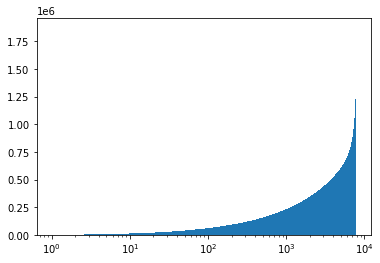

In [301]:
plt.hist(all_over_0_back['ETH_GTEX_core_over0'], density=False, bins = 10000, cumulative=True)
plt.xscale('log')


In [302]:
all_over_0_back.shape

(1871055, 2)

<ipython-input-299-25438d5dafce>:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 100)


(0.6385350108863779, 100)

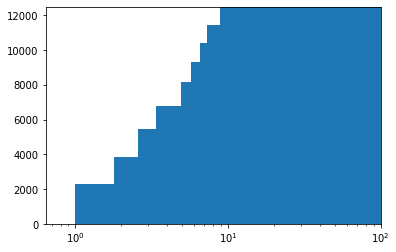

In [299]:
plt.hist(all_over_0_back['ETH_GTEX_core_over0'], density=False, bins = 10000, cumulative=True)
plt.xscale('log')
plt.ylim(0, 12500)
plt.xlim(0, 100)

In [283]:
1e6 * 0.25

250000.0

In [295]:
keep = all_over_0_back.loc[all_over_0_back['ETH_GTEX_core_over0'] < 3]

In [296]:
keep.shape

(3880, 2)

In [261]:
eth_res.merge(keep, how = 'inner', on = 'kmer')

,kmer,TCGABHA18V01A11RA12D07all,kmer_IL_eq,ETH_GTEX_core_over0


# Investigate backgrounds 

In [67]:
filt_ohsu.head()

,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,TCGA-BH-A18V-01A-11R-A12D-07,...,modified_upstream_txs,in-frame_all-transcript_biexons,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,in-frame neoepitopes,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons
0,chr10;48726;48803;-,0.000000,2.176140,0.842293,2.517914,0.961344,0.000000,5.700962,2.102386,1.237161,...,['ENST00000564130.2.MOD.CHR10.48726.48803.MINU...,MNMPSTPLAPTTGTATCSWSASTCTTTRPAVAGQCGAGNNWA;TQI...,TQIGQCGNQIGAKFWEVISDEHAIDSAGTYHGDSHLQLERINVYYN...,TCTTTRPAVAGQCGAG;NVYYNEASGGRYVPRAV,TCTTTRPAVAGQCGAG;NVYYNEASGGRYVPRAV,TCTTTRPAV;CTTTRPAVA;TTTRPAVAG;TTRPAVAGQ;TRPAVA...,17.0,TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG,5.0,MNMPSTPLAPTTGTATCSWSASTCTTTRPAVAGQCGAGNNWA;TQI...
1,chr10;277578;281199;-,2.295572,30.465966,16.003571,10.071656,26.917642,51.966700,53.589040,31.535793,50.723584,...,['ENST00000381496.7.MOD.CHR10.277578.281199.MI...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,RAHKSVTECAVFTWTNL,RAHKSVTECAVFTWTNL,RAHKSVTEC;AHKSVTECA;HKSVTECAV;KSVTECAVF;SVTECA...,9.0,NaN,0.0,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...
2,chr10;280261;281199;-,0.000000,0.000000,0.000000,0.000000,0.961344,0.000000,0.000000,6.307159,2.474321,...,['ENST00000381496.7.MOD.CHR10.280261.281199.MI...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...,RAHKSVTEC,RAHKSVTEC,RAHKSVTEC,1.0,NaN,0.0,TELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHKS...
3,chr10;281324;283271;-,3.443358,23.212165,18.530451,15.107483,20.188231,32.821074,33.065578,44.150110,40.826300,...,['ENST00000280886.12.MOD.CHR10.281324.283271.M...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...
4,chr10;283447;286272;-,1.147786,41.346668,19.372744,6.714437,28.840330,61.539513,62.710579,37.842952,92.787044,...,['ENST00000381496.7.MOD.CHR10.283447.286272.MI...,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...,LGDSHLGEIWVHSAHNA,LGDSHLGEIWVHSAHNA,LGDSHLGEI;GDSHLGEIW;DSHLGEIWV;SHLGEIWVH;HLGEIW...,9.0,NaN,0.0,LRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDSH...


In [102]:
expand_ohsu = []
for idx, row in filt_ohsu.iterrows():
    kmers = row['prefiltered_in-frame_epitopes']
    if kmers is not np.nan:
        for kmer in kmers.split(';'):
            expand_ohsu.append([row['jx'],kmer,row[sample], row[ 'GTEx_core_under3'] ])

In [103]:
expand_ohsu = pd.DataFrame(expand_ohsu, columns = ['jx', 'kmer', sample, 'OHSU_GTEx_core_under3'])

In [104]:
expand_ohsu.tail()

,jx,kmer,TCGA-BH-A18V-01A-11R-A12D-07,OHSU_GTEx_core_under3
1328273,chr2;109924424;109924621;+,KLTLKDKFV,4.948642,1803.0
1328274,chr2;109924424;109924621;+,LTLKDKFVE,4.948642,1803.0
1328275,chr2;109924424;109924621;+,TLKDKFVEI,4.948642,1803.0
1328276,chr2;109924424;109924621;+,LKDKFVEID,4.948642,1803.0
1328277,chr2;109924424;109924621;+,KDKFVEIDL,4.948642,1803.0


In [114]:
expand_ohsu = expand_ohsu.merge(all_over_3_back, on = 'kmer', how = 'inner')

In [99]:
expand_ohsu.loc[100:200]

,jx,kmer,TCGA-BH-A18V-01A-11R-A12D-07,OHSU_GTEx_core_under3,ETH_GTEX_core_over3
100,chr10;348763;349330;-,VALVYPPGI,25.980372,NaN,7080.0
101,chr10;348763;349330;-,ALVYPPGID,25.980372,NaN,7080.0
102,chr10;348763;349330;-,LVYPPGIDL,25.980372,NaN,7080.0
103,chr10;348763;349330;-,VYPPGIDLI,25.980372,NaN,7080.0
104,chr10;348763;349330;-,YPPGIDLIA,25.980372,NaN,7080.0
...,...,...,...,...,...
196,chr10;387810;389990;-,EAETIVNVL,68.043833,NaN,6923.0
197,chr10;387810;389990;-,AETIVNVLD,68.043833,NaN,6923.0
198,chr10;390094;390263;-,NNDTAYIEY,63.095190,NaN,6943.0
199,chr10;390094;390263;-,NDTAYIEYK,63.095190,NaN,6943.0


In [116]:
# Note that it was>=3 and <= 3 
expand_ohsu['sum_under_over_3'] = expand_ohsu['OHSU_GTEx_core_under3'] + expand_ohsu['ETH_GTEX_core_over3']

In [ ]:

expand_ohsu['sum_under_over_3']

In [117]:
expand_ohsu.head()

,jx,kmer,TCGA-BH-A18V-01A-11R-A12D-07,OHSU_GTEx_core_under3,ETH_GTEX_core_over3,sum_under_over_3
0,chr10;48726;48803;-,TCTTTRPAV,1.237161,662.0,380,1042.0
1,chr10;48726;48803;-,CTTTRPAVA,1.237161,662.0,369,1031.0
2,chr10;48726;48803;-,TTTRPAVAG,1.237161,662.0,369,1031.0
3,chr10;48726;48803;-,NVYYNEASG,1.237161,662.0,380,1042.0
4,chr10;48726;48803;-,VYYNEASGG,1.237161,662.0,369,1031.0


In [122]:
# Real size of the cohort = 7876

(array([ 95683.,  59173.,  53923.,  53325.,  57663.,  70782., 150451.,
        683453.,  18898.,   5364.]),
 array([1.0000e+00, 1.0630e+03, 2.1250e+03, 3.1870e+03, 4.2490e+03,
        5.3110e+03, 6.3730e+03, 7.4350e+03, 8.4970e+03, 9.5590e+03,
        1.0621e+04]),
 <BarContainer object of 10 artists>)

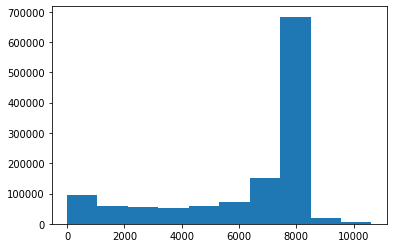

In [194]:
plt.hist(expand_ohsu['sum_under_over_3'])

(array([154820.,  65592.,  54387.,  52799.,  61583., 118788., 714185.,
         18153.,   7148.,   1260.]),
 array([1.26968004e-04, 1.53612615e-01, 3.07098261e-01, 4.60583908e-01,
        6.14069554e-01, 7.67555201e-01, 9.21040848e-01, 1.07452649e+00,
        1.22801214e+00, 1.38149779e+00, 1.53498343e+00]),
 <BarContainer object of 10 artists>)

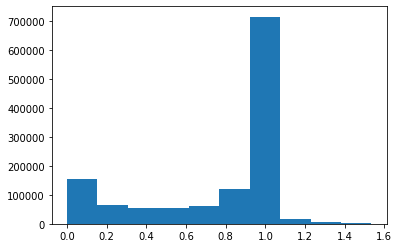

In [202]:
plt.hist((expand_ohsu['ETH_GTEX_core_over3'])/ (7876 - expand_ohsu['OHSU_GTEx_core_under3']))

{'whiskers': [<matplotlib.lines.Line2D at 0x2b371aae8ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b371aaed1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b371aae8760>],
 'medians': [<matplotlib.lines.Line2D at 0x2b371aaed880>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b371aaedbe0>],
 'means': []}

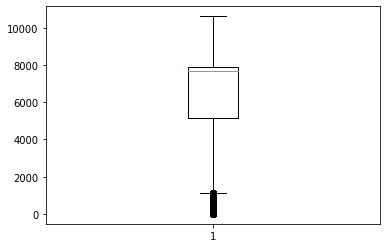

In [121]:
plt.boxplot(expand_ohsu['sum_under_over_3'])

In [ ]:
# Size of the cohort = 7876

In [131]:
print(expand_ohsu.shape)
for i in np.arange(7870, 7880,1):
    print (i)
    print(expand_ohsu.loc[expand_ohsu['sum_under_over_3'] ==i].shape)

(1248715, 6)
7870
(11391, 6)
7871
(13423, 6)
7872
(15876, 6)
7873
(20430, 6)
7874
(26084, 6)
7875
(41139, 6)
7876
(116858, 6)
7877
(4200, 6)
7878
(2752, 6)
7879
(1830, 6)


In [132]:
strict_partition = expand_ohsu.loc[expand_ohsu['sum_under_over_3'] == 7876, :]

In [134]:
strict_partition.iloc[100:200]

,jx,kmer,TCGA-BH-A18V-01A-11R-A12D-07,OHSU_GTEx_core_under3,ETH_GTEX_core_over3,sum_under_over_3
1001,chr10;5766153;5766240;-,LGTESQIFI,4587.391478,0.0,7876,7876.0
1002,chr10;5766153;5766240;-,GTESQIFIS,4587.391478,0.0,7876,7876.0
1003,chr10;5766153;5766240;-,TESQIFISR,4587.391478,0.0,7876,7876.0
1004,chr10;5766153;5766240;-,ESQIFISRT,4587.391478,0.0,7876,7876.0
1005,chr10;5766153;5766240;-,SQIFISRTY,4587.391478,0.0,7876,7876.0
...,...,...,...,...,...,...
1610,chr10;7783176;7787819;-,NGFKCHCMS,95.261366,70.0,7806,7876.0
1818,chr10;12170771;12170899;-,PKPKPGDGE,742.296356,9.0,7867,7876.0
1820,chr10;12170771;12170899;-,KPKPGDGEF,742.296356,9.0,7867,7876.0
1822,chr10;12170771;12170899;-,PKPGDGEFV,742.296356,9.0,7867,7876.0


#### Test 1 

In [177]:
N = 7876
X = 1

In [178]:
print('Exclude')
# Exclude
print(strict_partition.loc[strict_partition['ETH_GTEX_core_over3'] >= X ].shape)

# Exclude
print(strict_partition.loc[strict_partition['OHSU_GTEx_core_under3'] <= N - X ].shape)

print('Include')
# Include
print(strict_partition.loc[strict_partition['ETH_GTEX_core_over3'] < X ].shape)

# Include
print(strict_partition.loc[strict_partition['OHSU_GTEx_core_under3'] >  N - X ].shape)

Exclude
(116858, 6)
(116858, 6)
Include
(0, 6)
(0, 6)


#### Test 2

In [179]:
print('Exclude')
# Exclude
print(expand_ohsu.loc[expand_ohsu['ETH_GTEX_core_over3'] >= X ].shape)

# Exclude
print(expand_ohsu.loc[ N - expand_ohsu['ETH_GTEX_core_over3'] <= N - X ].shape)
print('Include')
# Include
print(expand_ohsu.loc[expand_ohsu['ETH_GTEX_core_over3'] < X ].shape)

# Include
print(expand_ohsu.loc[N - expand_ohsu['ETH_GTEX_core_over3'] >  N - X ].shape)

print('Exclude')
# Exclude
print(expand_ohsu.loc[N - expand_ohsu['OHSU_GTEx_core_under3'] >= X ].shape)

# Exclude
print(expand_ohsu.loc[expand_ohsu['OHSU_GTEx_core_under3'] <= N - X ].shape)
print('Include')
# Include
print(expand_ohsu.loc[N - expand_ohsu['OHSU_GTEx_core_under3'] < X ].shape)

# Include
print(expand_ohsu.loc[expand_ohsu['OHSU_GTEx_core_under3'] >  N - X ].shape)

Exclude
(1248715, 6)
(1248715, 6)
Include
(0, 6)
(0, 6)
Exclude
(1248715, 6)
(1248715, 6)
Include
(0, 6)
(0, 6)


In [147]:
filt_ohsu.columns

Index(['jx', 'TCGA-24-1431-01A-01R-1566-13', 'TCGA-24-2298-01A-01R-1569-13',
       'TCGA-25-1313-01A-01R-1565-13', 'TCGA-25-1319-01A-01R-1565-13',
       'TCGA-61-2008-01A-02R-1568-13', 'TCGA-A2-A0D2-01A-21R-A034-07',
       'TCGA-A2-A0SX-01A-12R-A084-07', 'TCGA-AO-A0JM-01A-21R-A056-07',
       'TCGA-BH-A18V-01A-11R-A12D-07', 'TCGA-C8-A12P-01A-11R-A115-07',
       'GTEx_brain_testis_over10', 'GTEx_brain_testis_under10',
       'GTEx_brain_testis_under3', 'GTEx_breast_over10', 'GTEx_breast_under10',
       'GTEx_breast_under3', 'GTEx_core_over10', 'GTEx_core_under10',
       'GTEx_core_under3', 'GTEx_ovary_over10', 'GTEx_ovary_under10',
       'GTEx_ovary_under3', 'all_TCGA_over10', 'all_TCGA_under10',
       'all_TCGA_under3', 'OV_over_5', 'OV_over_0', 'BRCA_over_5',
       'BRCA_over_0', 'BRCA_over_1', 'OV_over_1', 'motif', 'annotation',
       '5';3'_coding_regions', 'has_cds', 'gene', 'gene_id', 'upstream_exon',
       'upstream_txs', 'downstream_exon', 'downstream_txs',
       'mo

# ?

{'whiskers': [<matplotlib.lines.Line2D at 0x2b371b15ee80>,
 'caps': [<matplotlib.lines.Line2D at 0x2b371b168580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b371b15eb20>],
 'medians': [<matplotlib.lines.Line2D at 0x2b371b168c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b371b168fa0>],
 'means': []}

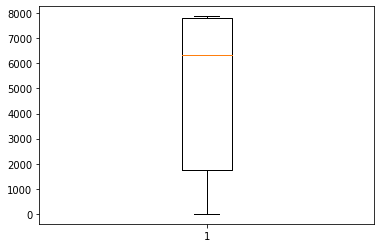

In [151]:
plt.boxplot(filt_ohsu['GTEx_core_over10'] + filt_ohsu['GTEx_core_under10'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b371b00a250>,
 'caps': [<matplotlib.lines.Line2D at 0x2b371b00a910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b371aebceb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b371b00afd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b371b014370>],
 'means': []}

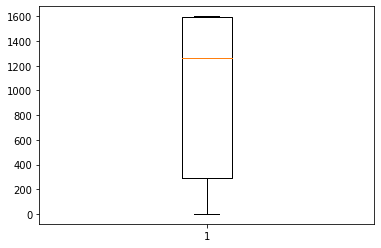

In [150]:
plt.boxplot(filt_ohsu['GTEx_brain_testis_over10'] + filt_ohsu['GTEx_brain_testis_under10'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2b371ad68e50>,
 'caps': [<matplotlib.lines.Line2D at 0x2b371ad72550>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b371ad68af0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b371ad72c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b371ad72f70>],
 'means': []}

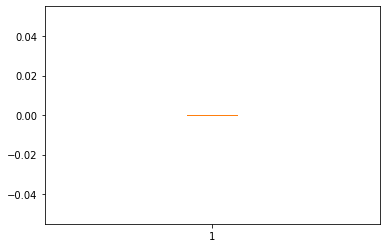

In [149]:
plt.boxplot(filt_ohsu['all_TCGA_over10'] + filt_ohsu['all_TCGA_under10'])

# Get ETH Summary table

In [9]:
output_f = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_TCGA-BH-A18V-01A-11R-A12D-07.all/commit_6e25db6_counts/G_filtered_df_TCGA-BH-A18V-01A-11R-A12D-07_samp_chrt_norm_mot_unip.tsv'
with open(output_f, 'r') as fp: 
    file_13 = []
    file_14 = []
    file_12 = []

    for line in fp.readlines():
        line = line.split('\n')[0]
        if 'sample' in line:
            columns = line.split('\t')
        elif len(line.split('\t')) == 14:
            file_14.append(line.split('\t'))
        elif len(line.split('\t')) == 13:
            file_13.append(line.split('\t'))
        elif len(line.split('\t')) == 12:
            file_12.append(line.split('\t'))
file_12 = pd.DataFrame(file_12)
file_13 = pd.DataFrame(file_13)
file_14 = pd.DataFrame(file_14)
# 1 Correct the missing columns 
mycols_12 = [name for name in columns if name != 'Init_cancer']
mycols_13 = columns 
mycols_14 = columns + ['duplicate']

if file_12.shape[0] > 0 : 
    file_12.columns = mycols_12
if file_13.shape[0] > 0 : 
    file_13.columns = mycols_13
if file_14.shape[0] > 0 : 
    file_14.columns = mycols_14

In [10]:
df_eth = file_13

In [11]:
df_eth = df_eth.loc[df_eth['normal_cohort_id'] == 'GTEXcore']

# Get OHSU Summary table

In [8]:
file_julianne_filtered = 'J_filtered_df_TCGA-BH-A18V-01A-11R-A12D-07_samp_chrt_norm_mot.tsv'
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/Aug21_graph_data_current/OHSU_kmer_lists_Nov24.tar.gz'
with tarfile.open(tar_file_OHSU, "r:*") as tar:
    file_names_OHSU = tar.getnames()
    df_ohsu = pd.read_csv(tar.extractfile(file_julianne_filtered), sep="\t")

    

In [12]:
df_ohsu = df_ohsu.loc[df_ohsu['normal_cohort_id'] == 'core_GTEx']

In [8]:
#df_ohsu = df_ohsu.astype(str)

In [13]:
df_ohsu.tail()

,sample,mutation_mode,pipeline,min_sample_reads,#_of_cohort_samples,reads_per_cohort_sample,#_normal_samples_allowed,normal_cohort_id,reads_per_normal_sample,motif_filter,Init_cancer,Filter_Sample,Filter_Sample_Cohort,Filter_Sample_Cohort_CohortBackground,Filter_Motif,Filter_Sample_Cohort_CohortBackground_Uniprot
475,TCGA-BH-A18V-01A-11,ref,junction-based,2,10,5,0,core_GTEx,0,0,1328278,1152951,1115381,27,27,18
476,TCGA-BH-A18V-01A-11,ref,junction-based,2,10,5,2,core_GTEx,3,0,1328278,1152951,1115381,27,27,18
477,TCGA-BH-A18V-01A-11,ref,junction-based,2,10,5,2,core_GTEx,10,0,1328278,1152951,1115381,27,27,18
478,TCGA-BH-A18V-01A-11,ref,junction-based,2,10,5,10,core_GTEx,3,0,1328278,1152951,1115381,36,36,18
479,TCGA-BH-A18V-01A-11,ref,junction-based,2,10,5,10,core_GTEx,10,0,1328278,1152951,1115381,45,45,26


# Analyze summary tables

In [15]:

def filter_cond(df):

    display(df.loc[
        (df['min_sample_reads'] == '0.0') &   \
    (df['#_of_cohort_samples'] == '10') &  \
    (df['reads_per_cohort_sample'] == '5.0') & \
    (df['#_normal_samples_allowed'] == '10') & \
   (df['reads_per_normal_sample'] == '3.0' ) \
                   , :])

    display(df.loc[
        (df['min_sample_reads'] == 0) &  \
    (df['#_of_cohort_samples'] == 10) &  \
    (df['reads_per_cohort_sample'] == 5) & \
    (df['#_normal_samples_allowed'] == 10) & \
   (df['reads_per_normal_sample'] == 3 ) \
                   , :])

print('ohsu')
filter_cond(df_ohsu)
print('eth')
filter_cond(df_eth)

ohsu


,sample,mutation_mode,pipeline,min_sample_reads,#_of_cohort_samples,reads_per_cohort_sample,#_normal_samples_allowed,normal_cohort_id,reads_per_normal_sample,motif_filter,Init_cancer,Filter_Sample,Filter_Sample_Cohort,Filter_Sample_Cohort_CohortBackground,Filter_Motif,Filter_Sample_Cohort_CohortBackground_Uniprot


,sample,mutation_mode,pipeline,min_sample_reads,#_of_cohort_samples,reads_per_cohort_sample,#_normal_samples_allowed,normal_cohort_id,reads_per_normal_sample,motif_filter,Init_cancer,Filter_Sample,Filter_Sample_Cohort,Filter_Sample_Cohort_CohortBackground,Filter_Motif,Filter_Sample_Cohort_CohortBackground_Uniprot
298,TCGA-BH-A18V-01A-11,ref,junction-based,0,10,5,10,core_GTEx,3,1,1328278,1328278,1214064,43,34,15
418,TCGA-BH-A18V-01A-11,ref,junction-based,0,10,5,10,core_GTEx,3,0,1328278,1328278,1214064,43,43,24


eth


,sample,mutation_mode,min_sample_reads,#_of_cohort_samples,reads_per_cohort_sample,#_normal_samples_allowed,normal_cohort_id,reads_per_normal_sample,Init_cancer,Filter_Sample,Filter_Sample_Cohort,Filter_Sample_Cohort_CohortNormal,Filter_Sample_Cohort_CohortNormal_Uniprot
165,TCGA-BH-A18V-01A-11R-A12D-07.all,ref,0.0,10,5.0,10,GTEXcore,3.0,1816184,1816184,1707772,22419,22392


,sample,mutation_mode,min_sample_reads,#_of_cohort_samples,reads_per_cohort_sample,#_normal_samples_allowed,normal_cohort_id,reads_per_normal_sample,Init_cancer,Filter_Sample,Filter_Sample_Cohort,Filter_Sample_Cohort_CohortNormal,Filter_Sample_Cohort_CohortNormal_Uniprot


min_sample_reads = 2, #_of_cohort_samples = 10, reads_per_cohort_sample = 5, 
#_normal_samples_allowed = 10, reads_per_normal_sample = 3

# Reproduce filtering on OHSU


 initial


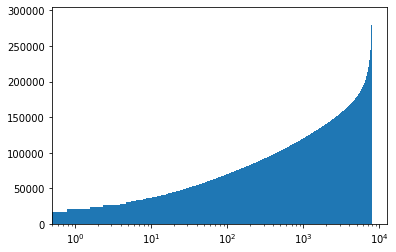

In [357]:
filt_ohsu = pd.read_csv(path_julianne, sep = '\t')
sample = 'TCGA-BH-A18V-01A-11R-A12D-07'
print('\n initial')
filt_ohsu = filt_ohsu.loc[filt_ohsu[sample] >0, : ] 
plt.hist(filt_ohsu['GTEx_core_over10'], density=False, bins = 10000, cumulative=True)
plt.xscale('log')

<ipython-input-358-77db5a34b7e3>:4: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(0, 100)


(0.24000716776372752, 100)

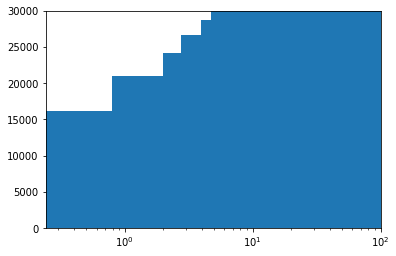

In [358]:
plt.hist(filt_ohsu['GTEx_core_over10'], density=False, bins = 20000, cumulative=True)
plt.xscale('log')
plt.ylim(0, 30000)
plt.xlim(0, 100)

In [326]:
N

7876

In [19]:
filt_ohsu = pd.read_csv(path_julianne, sep = '\t')

print('\n initial')
filt_ohsu = filt_ohsu.loc[filt_ohsu[sample] >0, : ] 
ohsu_sample_kmer = unique_kmers(filt_ohsu,  'prefiltered_in-frame_epitopes')

ohsu_init = unique_kmers(filt_ohsu,  'prefiltered_in-frame_epitopes')
print('{} using prefiltered_inframe_epitope_count sum'.format(
    filt_ohsu['prefiltered_inframe_epitope_count'].sum()))
ohus_res = unique_kmers(filt_ohsu,  'in-frame neoepitopes')
print('{} using in-frame_neoepitope_count sum'.format(
    filt_ohsu['in-frame_neoepitope_count'].sum()))

# print(len(ohus_res.intersection(expressed_eth_set)))
# print(len(ohsu_init.intersection(expressed_eth_set)))

# #min_sample_reads = 2
# print('\n sample filter')
# filt_ohsu = filt_ohsu.loc[filt_ohsu[sample] >=2, : ] 
# ohsu_pref = unique_kmers(filt_ohsu,  'prefiltered_in-frame_epitopes')
# print('{} using prefiltered_inframe_epitope_count sum'.format(
#     filt_ohsu['prefiltered_inframe_epitope_count'].sum()))
# ohus_res = unique_kmers(filt_ohsu,  'in-frame neoepitopes')
# print('{} using in-frame_neoepitope_count sum'.format(
#     filt_ohsu['in-frame_neoepitope_count'].sum()))

# print(len(ohus_res.intersection(expressed_eth_set)))
# print(len(ohsu_pref.intersection(expressed_eth_set)))

#_of_cohort_samples = 10, reads_per_cohort_sample = 5, 
print('\n sample cohort filter')
filt_ohsu = filt_ohsu.loc[filt_ohsu['BRCA_over_5'] >= 10, : ] 
ohsu_pref = unique_kmers(filt_ohsu,  'prefiltered_in-frame_epitopes')
print('{} using prefiltered_inframe_epitope_count sum'.format(
    filt_ohsu['prefiltered_inframe_epitope_count'].sum()))
ohus_res = unique_kmers(filt_ohsu,  'in-frame neoepitopes')
print('{} using in-frame_neoepitope_count sum'.format(
    filt_ohsu['in-frame_neoepitope_count'].sum()))

# print(len(ohus_res.intersection(expressed_eth_set)))
# print(len(ohsu_pref.intersection(expressed_eth_set)))



# print(len(ohus_res.intersection(expressed_eth_set)))
# print(len(ohsu_pref.intersection(expressed_eth_set)))


print('\n Do keep if normalized expression < 3 reads in all samples ')
filt_ohsu = filt_ohsu.loc[~(filt_ohsu['GTEx_core_over3'] >=1 ) , : ]
ohsu_pref = unique_kmers(filt_ohsu,  'prefiltered_in-frame_epitopes')
print('{} using prefiltered_inframe_epitope_count sum'.format(
    filt_ohsu['prefiltered_inframe_epitope_count'].sum()))
ohus_res = unique_kmers(filt_ohsu,  'in-frame neoepitopes')
print('{} using in-frame_neoepitope_count sum'.format(
    filt_ohsu['in-frame_neoepitope_count'].sum()))

print('\n Do keep if normalized expression > 0 in < 10 samples ????')
filt_ohsu = filt_ohsu.loc[~(filt_ohsu['GTEx_core_over0'] >=10), : ]
ohsu_pref = unique_kmers(filt_ohsu,  'prefiltered_in-frame_epitopes')
print('{} using prefiltered_inframe_epitope_count sum'.format(
    filt_ohsu['prefiltered_inframe_epitope_count'].sum()))
ohus_res = unique_kmers(filt_ohsu,  'in-frame neoepitopes')
print('{} using in-frame_neoepitope_count sum'.format(
    filt_ohsu['in-frame_neoepitope_count'].sum()))


# #_normal_samples_allowed = 10, reads_per_normal_sample = 3
# print('\n sample background cohort filter')
# print('\n Do keep if normalized expression > 0 // 3 in < 10 samples ????')
# # Over zero and less than 3 in 10 samples 
# # less than three is already achieved 
# # [<10 samples with expression > 0] ( <expression < 3)
# # KEEP filt_ohsu.loc[filt_ohsu['GTEx_core_over0'] < 10  , : ]
# filt_ohsu = filt_ohsu.loc[filt_ohsu['GTEx_core_under3'] <= 10  , : ]





 initial
1227098 unique prefiltered_in-frame_epitopes kmers
1227098 unique prefiltered_in-frame_epitopes kmers
1328278.0 using prefiltered_inframe_epitope_count sum
285533 unique in-frame neoepitopes kmers
297533.0 using in-frame_neoepitope_count sum

 sample cohort filter
1124179 unique prefiltered_in-frame_epitopes kmers
1214064.0 using prefiltered_inframe_epitope_count sum
197001 unique in-frame neoepitopes kmers
204445.0 using in-frame_neoepitope_count sum

 Do keep if normalized expression < 3 reads in all samples 
43 unique prefiltered_in-frame_epitopes kmers
43.0 using prefiltered_inframe_epitope_count sum
24 unique in-frame neoepitopes kmers
24.0 using in-frame_neoepitope_count sum

 Do keep if normalized expression > 0 in < 10 samples ????
43 unique prefiltered_in-frame_epitopes kmers
43.0 using prefiltered_inframe_epitope_count sum
24 unique in-frame neoepitopes kmers
24.0 using in-frame_neoepitope_count sum


In [320]:
ohus_res

{'ALPAWQVYL',
 'ALRGQLSQI',
 'ALRGQYEKM',
 'AQPHPSTPQ',
 'ATAQPHPST',
 'EALPAWQVY',
 'EEKVSQPEA',
 'EKVSQPEAL',
 'ELKSSNTYQ',
 'EMNALRGQL',
 'EMNALRGQY',
 'ESNVQEVSL',
 'ETELKSSNT',
 'EVSLTVCLL',
 'GQLSQIQGL',
 'GQYEKMAEK',
 'HPSTPQPVL',
 'KESNVQEVS',
 'KVSQPEALP',
 'LRGQLSQIQ',
 'LRGQYEKMA',
 'MNALRGQLS',
 'MNALRGQYE',
 'NALRGQLSQ',
 'NALRGQYEK',
 'NVQEVSLTV',
 'PATAQPHPS',
 'PEALPAWQV',
 'PHPSTPQPV',
 'PSTPQPVLL',
 'QETELKSSN',
 'QEVSLTVCL',
 'QPEALPAWQ',
 'QPHPSTPQP',
 'QQETELKSS',
 'RGQLSQIQG',
 'RGQYEKMAE',
 'RPATAQPHP',
 'RSQQETELK',
 'SNVQEVSLT',
 'SQPEALPAW',
 'SQQETELKS',
 'TAQPHPSTP',
 'TELKSSNTY',
 'TRSQQETEL',
 'VQEVSLTVC',
 'VSLTVCLLY',
 'VSQPEALPA',
 'VTRSQQETE'}

In [60]:
7876 - 10

7866

In [360]:
file_julianne_res = 'J_TCGA-BH-A18V-01A-11R-A12D-07.all_ref_NormalCohortcore_GTEx_SampleLim0CohortLim5.0Across10_FiltNormalsCohortlim3.0Across10_FiltUniprot.tsv'
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/Aug21_graph_data_current/OHSU_kmer_lists_Nov24.tar.gz'
with tarfile.open(tar_file_OHSU, "r:*") as tar:
    #file_names_OHSU = tar.getnames()
    ohsu_j_run = pd.read_csv(tar.extractfile(file_julianne_res), sep="\t")


In [361]:
ohsu_j_run.head()

,kmer
0,SFPFGGVGW
1,FPFGGVGWL
2,PFGGVGWLW
3,FGGVGWLWV
4,GGVGWLWVG


In [362]:
ohsu_j_run = set(ohsu_j_run['kmer'])



In [363]:
len(ohsu_j_run)

24

In [364]:
len(ohsu_j_run.intersection(ohus_res))

18

In [14]:
filt_ohsu.columns

Index(['jx', 'TCGA-24-1431-01A-01R-1566-13', 'TCGA-24-2298-01A-01R-1569-13',
       'TCGA-25-1313-01A-01R-1565-13', 'TCGA-25-1319-01A-01R-1565-13',
       'TCGA-61-2008-01A-02R-1568-13', 'TCGA-A2-A0D2-01A-21R-A034-07',
       'TCGA-A2-A0SX-01A-12R-A084-07', 'TCGA-AO-A0JM-01A-21R-A056-07',
       'TCGA-BH-A18V-01A-11R-A12D-07', 'TCGA-C8-A12P-01A-11R-A115-07',
       'GTEx_brain_testis_over10', 'GTEx_brain_testis_under10',
       'GTEx_brain_testis_under3', 'GTEx_breast_over10', 'GTEx_breast_under10',
       'GTEx_breast_under3', 'GTEx_core_over10', 'GTEx_core_under10',
       'GTEx_core_under3', 'GTEx_ovary_over10', 'GTEx_ovary_under10',
       'GTEx_ovary_under3', 'all_TCGA_over10', 'all_TCGA_under10',
       'all_TCGA_under3', 'OV_over_5', 'OV_over_0', 'BRCA_over_5',
       'BRCA_over_0', 'BRCA_over_1', 'OV_over_1', 'motif', 'annotation',
       '5';3'_coding_regions', 'has_cds', 'gene', 'gene_id', 'upstream_exon',
       'upstream_txs', 'downstream_exon', 'downstream_txs',
       'mo

In [15]:
filt_ohsu.head()

,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,TCGA-BH-A18V-01A-11R-A12D-07,...,modified_upstream_txs,in-frame_all-transcript_biexons,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,in-frame neoepitopes,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons
43,chr10;814851;814945;-,154.951119,204.557201,139.820676,144.360397,183.616770,248.893143,213.215970,94.607379,445.377813,...,['ENST00000448368.5.MOD.CHR10.814851.814945.MI...,VPASCAVSATYERSPSPAHLPDDPKVAEKQRETHSVDRLPSALTAT...,IIGPSKERTLSADASVNTLPVVVSREPSVPASCAVSATYERSPSPA...,SPSPAHLPDDPKVAEKQ,SPSPAHLPDDPKVAEKQ;SPSPAHLPDDPKVAEK,SPSPAHLPD;PSPAHLPDD;SPAHLPDDP;PAHLPDDPK;AHLPDD...,9.0,NaN,0.0,VPASCAVSATYERSPSPAHLPDDPKVAEKQRETHSVDRLPSALTAT...
44,chr10;815071;817724;-,165.281193,350.358610,210.573307,215.701291,278.789860,239.320330,141.383851,121.938400,478.781149,...,['ENST00000448368.5.MOD.CHR10.815071.817724.MI...,SFELGLSSFPPLPGAAGNLKTEDLFENRLSSLIIGPSKERTLSADA...,NaN,NaN,IIGPSKERTLSADASVN,NaN,0.0,NaN,0.0,SSQTQSPTPPKPPSPSFELGLSSFPPLPGAAGNLKTEDLFENRLSS...
62,chr10;1041505;1042631;-,122.813109,223.417085,74.964097,190.522152,180.732737,624.967948,174.449430,496.163145,633.426223,...,['ENST00000429642.2.MOD.CHR10.1041505.1042631....,KITFPGCFTNTCCSHPLSNPAELEESDALGVRRAAQRRLKAELGIP...,KITFPGCFTNTCCSHPLSNPAELEESDALGVRRAAQRRLKAELGIP...,ELGIPLEEVPPEEINYL,ELGIPLEEVPPEEINYL,ELGIPLEEV;LGIPLEEVP;GIPLEEVPP;IPLEEVPPE;PLEEVP...,9.0,NaN,0.0,KITFPGCFTNTCCSHPLSNPAELEESDALGVRRAAQRRLKAELGIP...
63,chr10;1042763;1043300;-,118.221965,311.913462,106.128947,231.648080,292.248681,635.908306,208.655200,681.173132,728.687589,...,['ENST00000429642.2.MOD.CHR10.1042763.1043300....,MELDLFLGLDDVFPRLLHGLLHRAFSVFLFNTENKLLLQQRSDAKI...,MELDLFLGLDDVFPRLLHGLLHRAFSVFLFNTENKLLLQQRSDAKI...,SDAKITFPGCFTNTCCS,SDAKITFPGCFTNTCCS,SDAKITFPG;DAKITFPGC;AKITFPGCF;KITFPGCFT;ITFPGC...,9.0,NaN,0.0,MELDLFLGLDDVFPRLLHGLLHRAFSVFLFNTENKLLLQQRSDAKI...
69,chr10;3138125;3138234;-,382.212759,314.814983,248.476502,456.581722,249.949529,326.843194,226.898278,210.238621,559.196588,...,['ENST00000451104.6.MOD.CHR10.3138125.3138234....,SVFSTVDAPVAPSDKGMDHFLYGLSDEMKQAHREQLFAVSHDKLLA...,SVFSTVDAPVAPSDKGMDHFLYGLSDEMKQAHREQLFAVSHDKLLA...,DKLLAVSDRYLGTGKST,DKLLAVSDRYLGTGKST,DKLLAVSDR;KLLAVSDRY;LLAVSDRYL;LAVSDRYLG;AVSDRY...,9.0,NaN,0.0,SVFSTVDAPVAPSDKGMDHFLYGLSDEMKQAHREQLFAVSHDKLLA...


In [16]:
# for sample in ['TCGA-BH-A18V-01A-11R-A12D-07']:
# # 'TCGA-BH-A18V-01A-11R-A12D-07', 'TCGA-A2-A0SX-01A-12R-A084-07', 
# #                'TCGA-AO-A0JM-01A-21R-A056-07', 'TCGA-BH-A18V-01A-11R-A12D-07']:

#     sample_interest = df_ohsu.loc[df_ohsu[sample] > 0 , :]
#     print(sample)
#     print('sum prefiltered_inframe_epitope_count')
#     print(sample_interest['prefiltered_inframe_epitope_count'].sum())
#     print('sum frame_neoepitope_count')
#     print(sample_interest['in-frame_neoepitope_count'].sum())

# Compute Overlap 

### From filtering 

In [78]:
#min_sample_reads = 2, #_of_cohort_samples = 10, reads_per_cohort_sample = 5,

#_normal_samples_allowed = 10, reads_per_normal_sample = 3


In [82]:
len(ohus_res)

11033

In [83]:
len(eth_res)

21231

In [84]:
len(ohus_res.intersection(eth_res))

49

### Initial cohorts

In [25]:
len(ohsu_init)

1227098

In [26]:
len(ohsu_init.intersection(eth_res))

366

In [ ]:
foo.shape

In [ ]:
foo.loc[ foo['TCGA-BH-A18V-01A-11R-A12D-07.all'] >0 ].shape

In [41]:
expressed_eth = foo.loc[ foo['TCGA-BH-A18V-01A-11R-A12D-07.all'] >0 , :]

In [43]:
expressed_eth.head()

,kmer,TCGA-BH-A18V-01A-11R-A12D-07.all
180,MEAGSPENK,61.0
181,EAGSPENKK,61.0
182,AGSPENKKQ,61.0
183,GSPENKKQR,61.0
184,SPENKKQRS,61.0


In [46]:
expressed_eth_set = set(expressed_eth['kmer'])

In [50]:
len(ohsu_init)

1227098

In [51]:
len(expressed_eth_set) #WITH ANNOTATION

1816184

In [52]:
len(ohsu_init.intersection(expressed_eth_set))

1074671